In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("Toddler Autism dataset July 2018.csv")
data

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White European      yes                  no   
2                  4   m  middle eastern      yes                  no   
3                 10   m        Hispanic       no                  no   
4                  9   f  White European       no                 yes   
...              ...  ..             ...      ...                 ...   
1049               1   f  White European       no                 yes   
1050               5   m           black      yes                  no   
1051               9   m  middle eastern      yes                  no   
1052               3   m  White European       no                 yes   
1053               6   m           asian      yes                 yes   

     Who completed the test Class/ASD Traits   
0             family member                No  
1             family member               Yes  
2             family member               Yes  
3             family member               Yes  
4             family member               Yes  
...                     ...               ...  
1049          family member                No  
1050          family member               Yes  
1051          family member               Yes  
1052          family member                No  
1053          family member               Yes  

[1054 rows x 19 columns]

In [ ]:
# Detecting any missing values
data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [ ]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
data=data.drop("Case_No",axis=1)

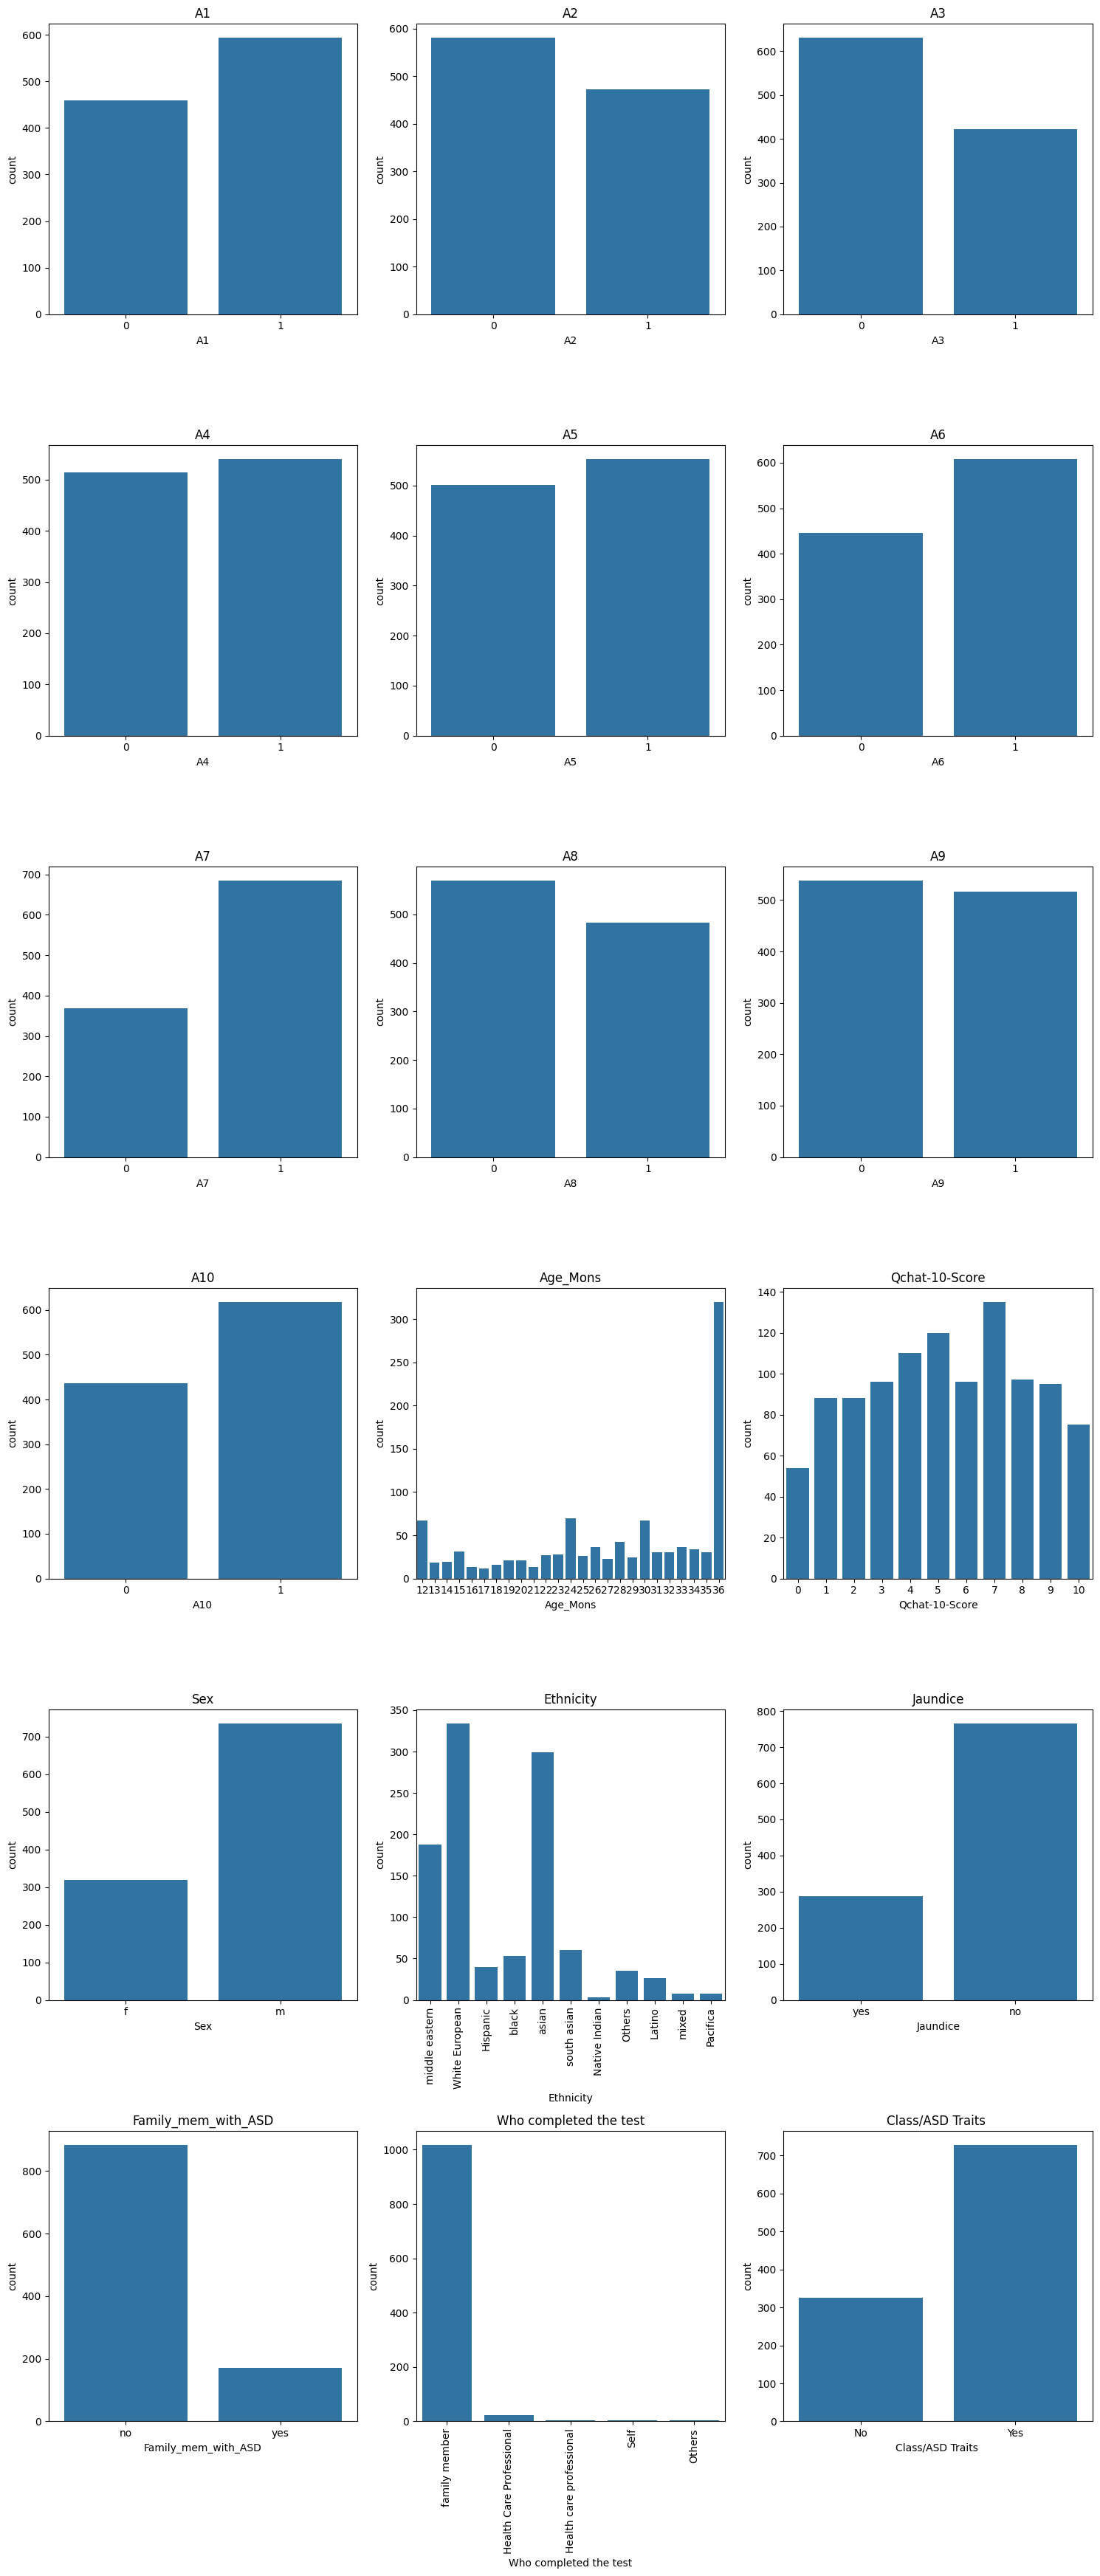

In [ ]:
# Countplot for each feature
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

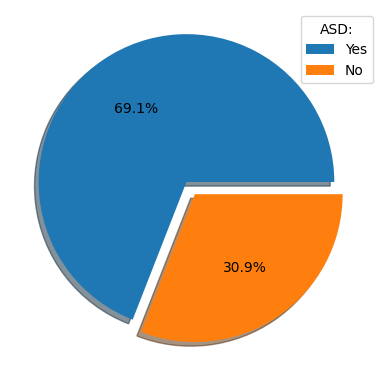

In [ ]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

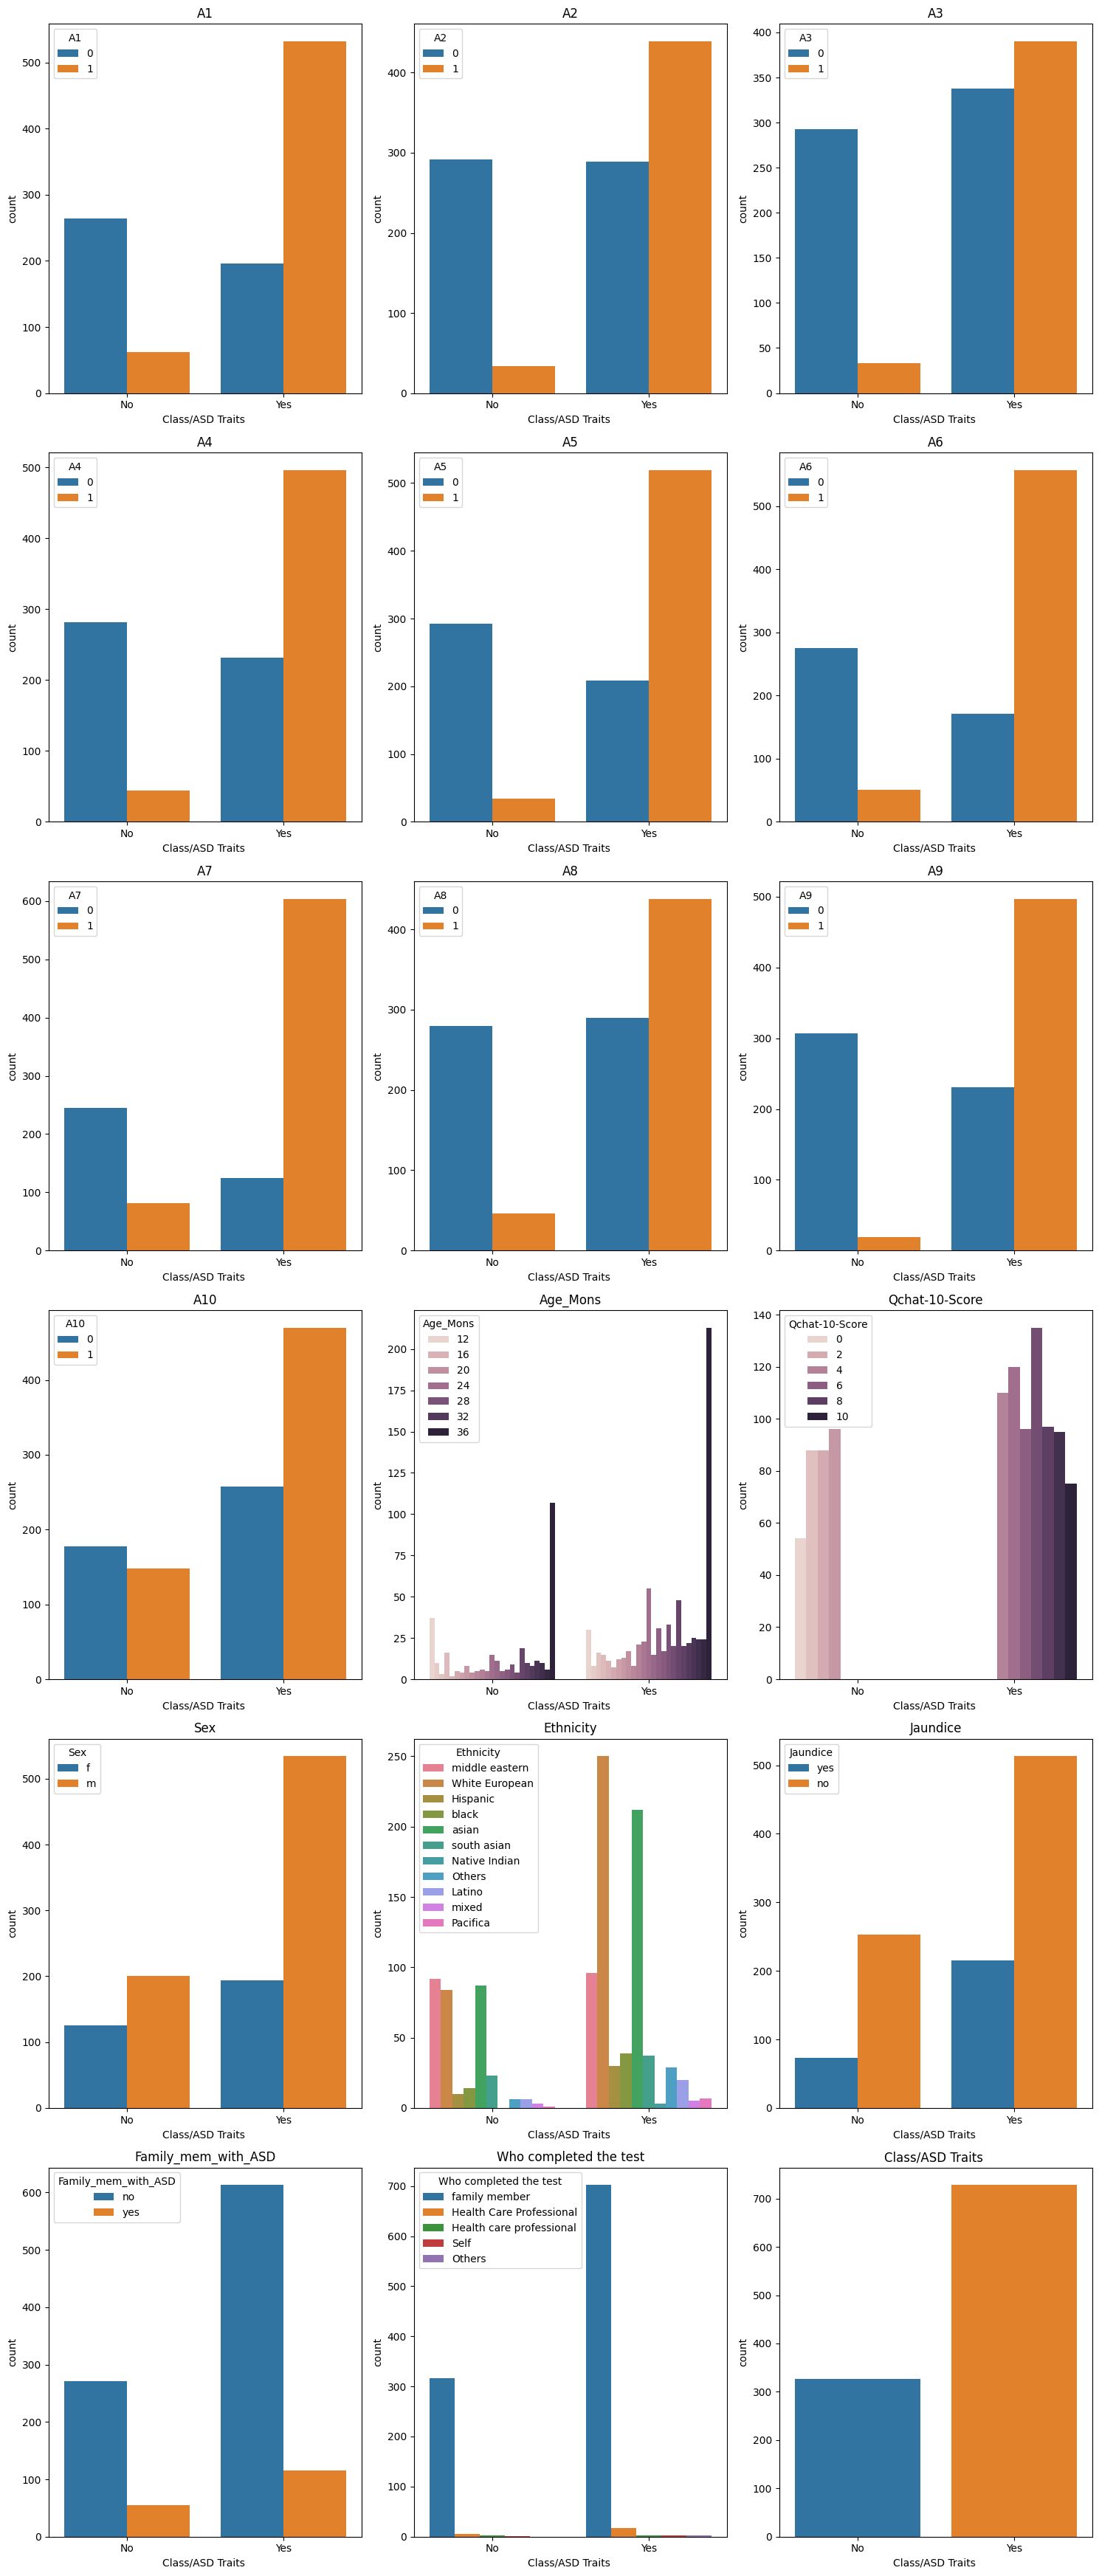

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(x=data["Class/ASD Traits "], hue=data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
data.groupby('Ethnicity').size()

Ethnicity
Hispanic           40
Latino             26
Native Indian       3
Others             35
Pacifica            8
White European    334
asian             299
black              53
middle eastern    188
mixed               8
south asian        60
dtype: int64

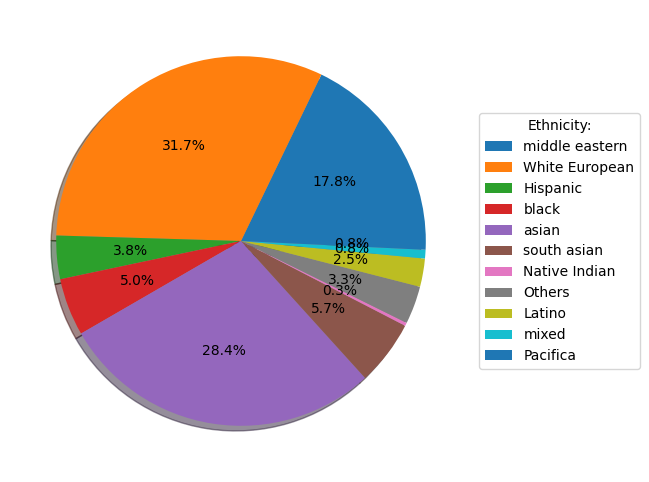

In [ ]:
labels = ['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica']
plt.figure(figsize=(10, 6))
plt.pie(data.groupby('Ethnicity').size().reindex(labels), shadow = True,autopct='%1.1f%%')
plt.legend(title = "Ethnicity:",labels = labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

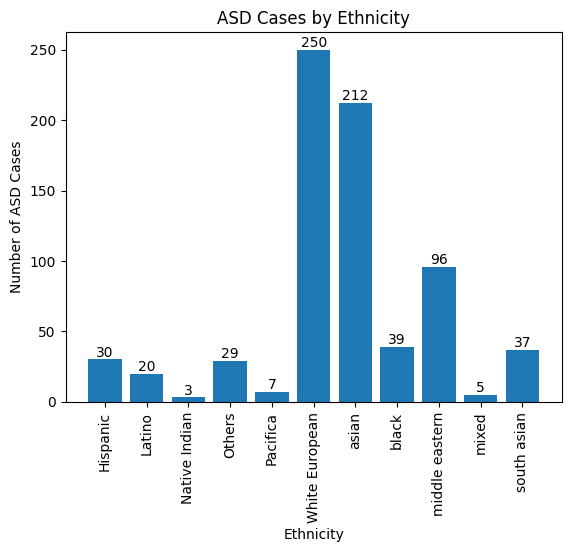

In [ ]:
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
bars=plt.bar(asd_counts_ethnicity.index, asd_counts_ethnicity.values)
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

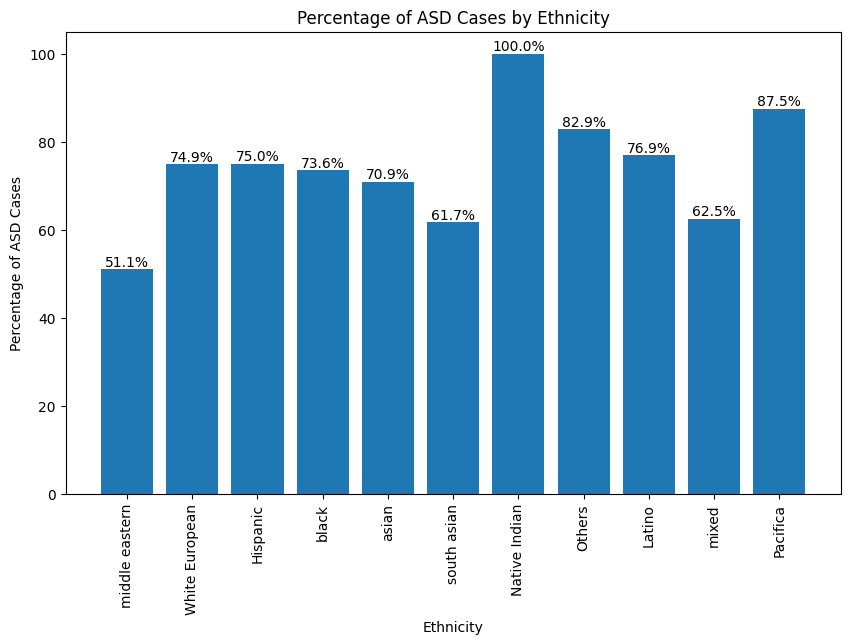

In [ ]:
total_ethnicity_counts = data.groupby('Ethnicity').size()
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
asd_percentage_ethnicity = (asd_counts_ethnicity / total_ethnicity_counts) * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(asd_percentage_ethnicity.reindex(labels).index, asd_percentage_ethnicity.reindex(labels).values)
plt.xlabel('Ethnicity')
plt.ylabel('Percentage of ASD Cases')
plt.title('Percentage of ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center')
plt.show()

In [ ]:
data.groupby('Sex').size()

Sex
f    319
m    735
dtype: int64

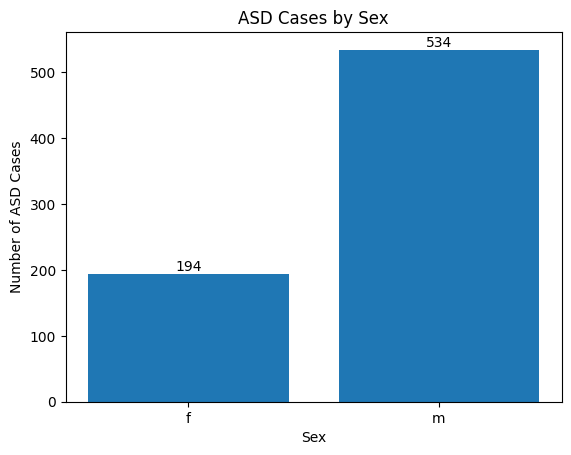

In [ ]:
asd_counts_sex = data[data['Class/ASD Traits '] == 'Yes'].groupby('Sex').size()
bars=plt.bar(asd_counts_sex.index, asd_counts_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Sex')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

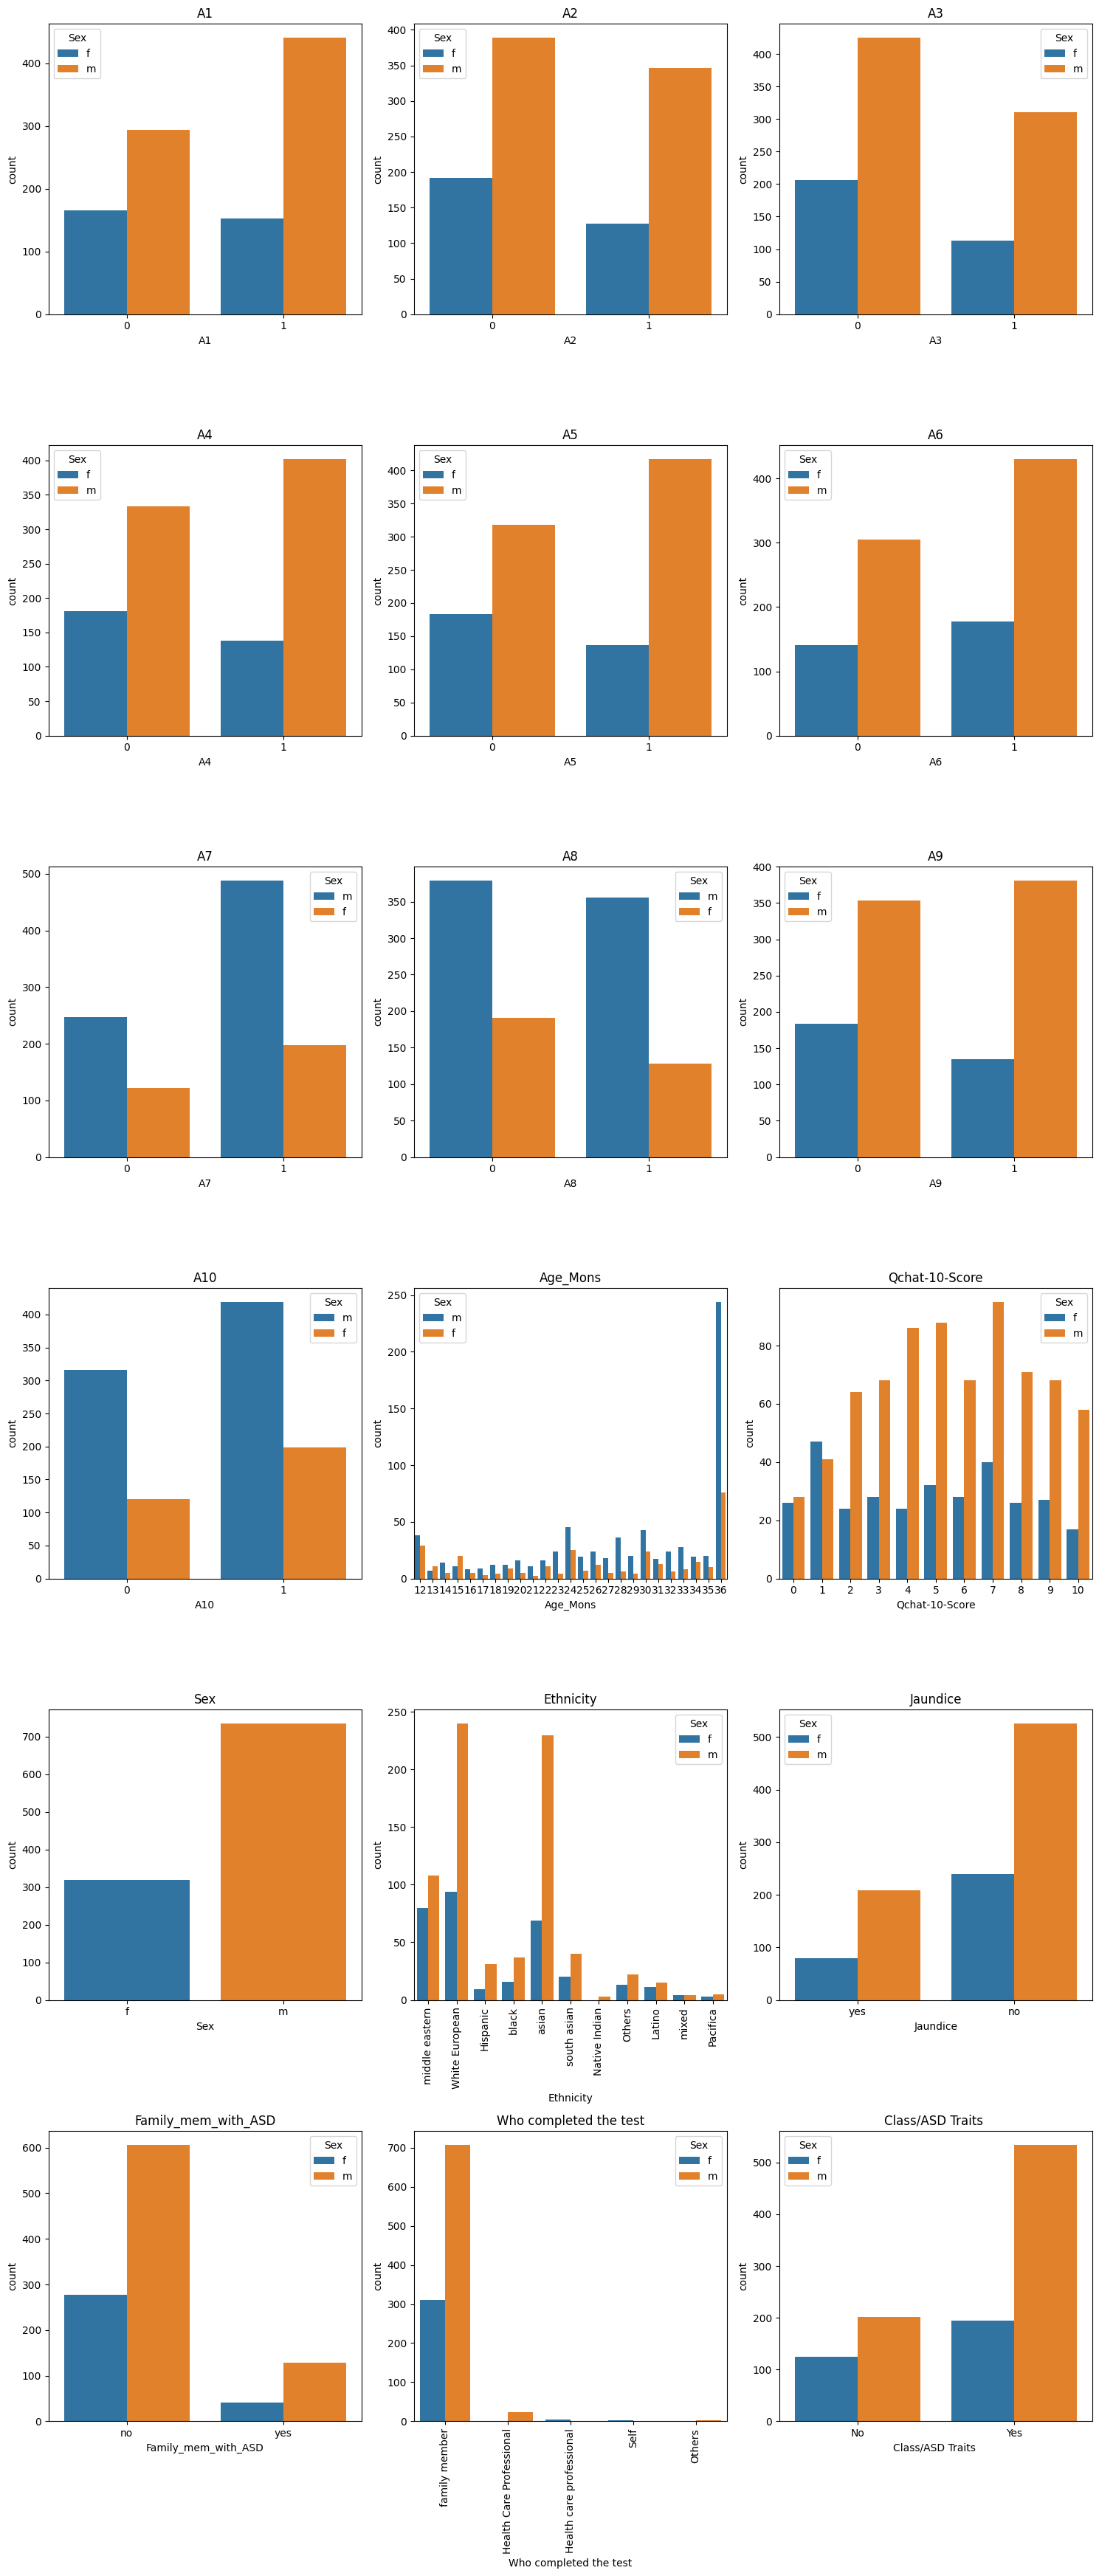

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Sex"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [ ]:
data.groupby('Jaundice').size()

Jaundice
no     766
yes    288
dtype: int64

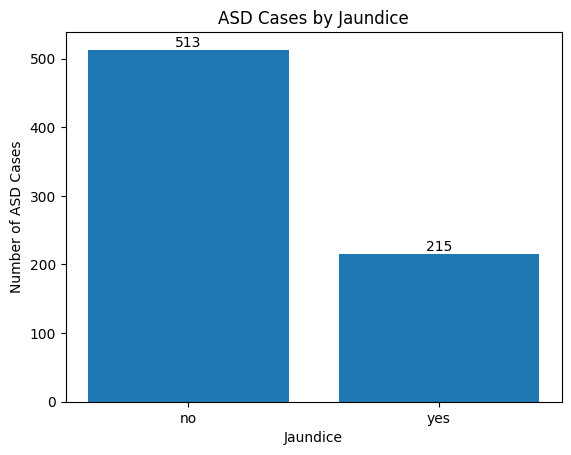

In [ ]:
# Toddlers who have ASD and then they have Jaundice
asd_counts_jaundice = data[data['Class/ASD Traits '] == 'Yes'].groupby('Jaundice').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('Jaundice')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

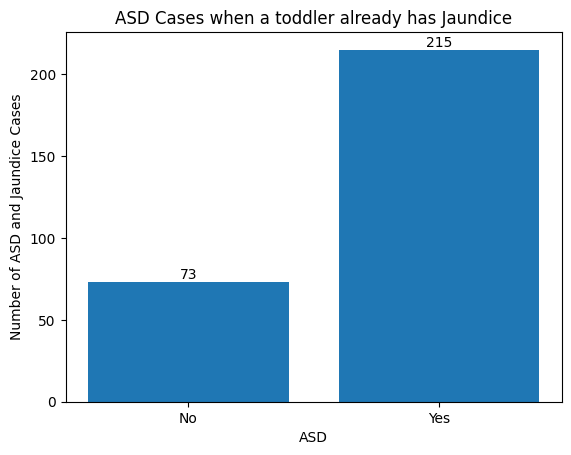

In [ ]:
# Toddlers who have Jaundice and then they have ASD
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [ ]:
data.groupby("Family_mem_with_ASD").size()

Family_mem_with_ASD
no     884
yes    170
dtype: int64

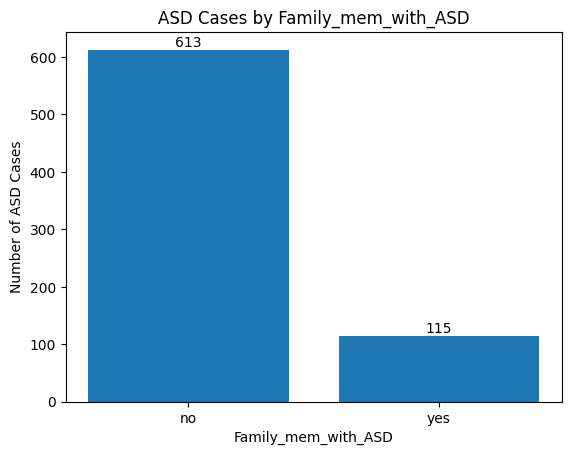

In [ ]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Family_mem_with_ASD').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Family_mem_with_ASD')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Family_mem_with_ASD')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

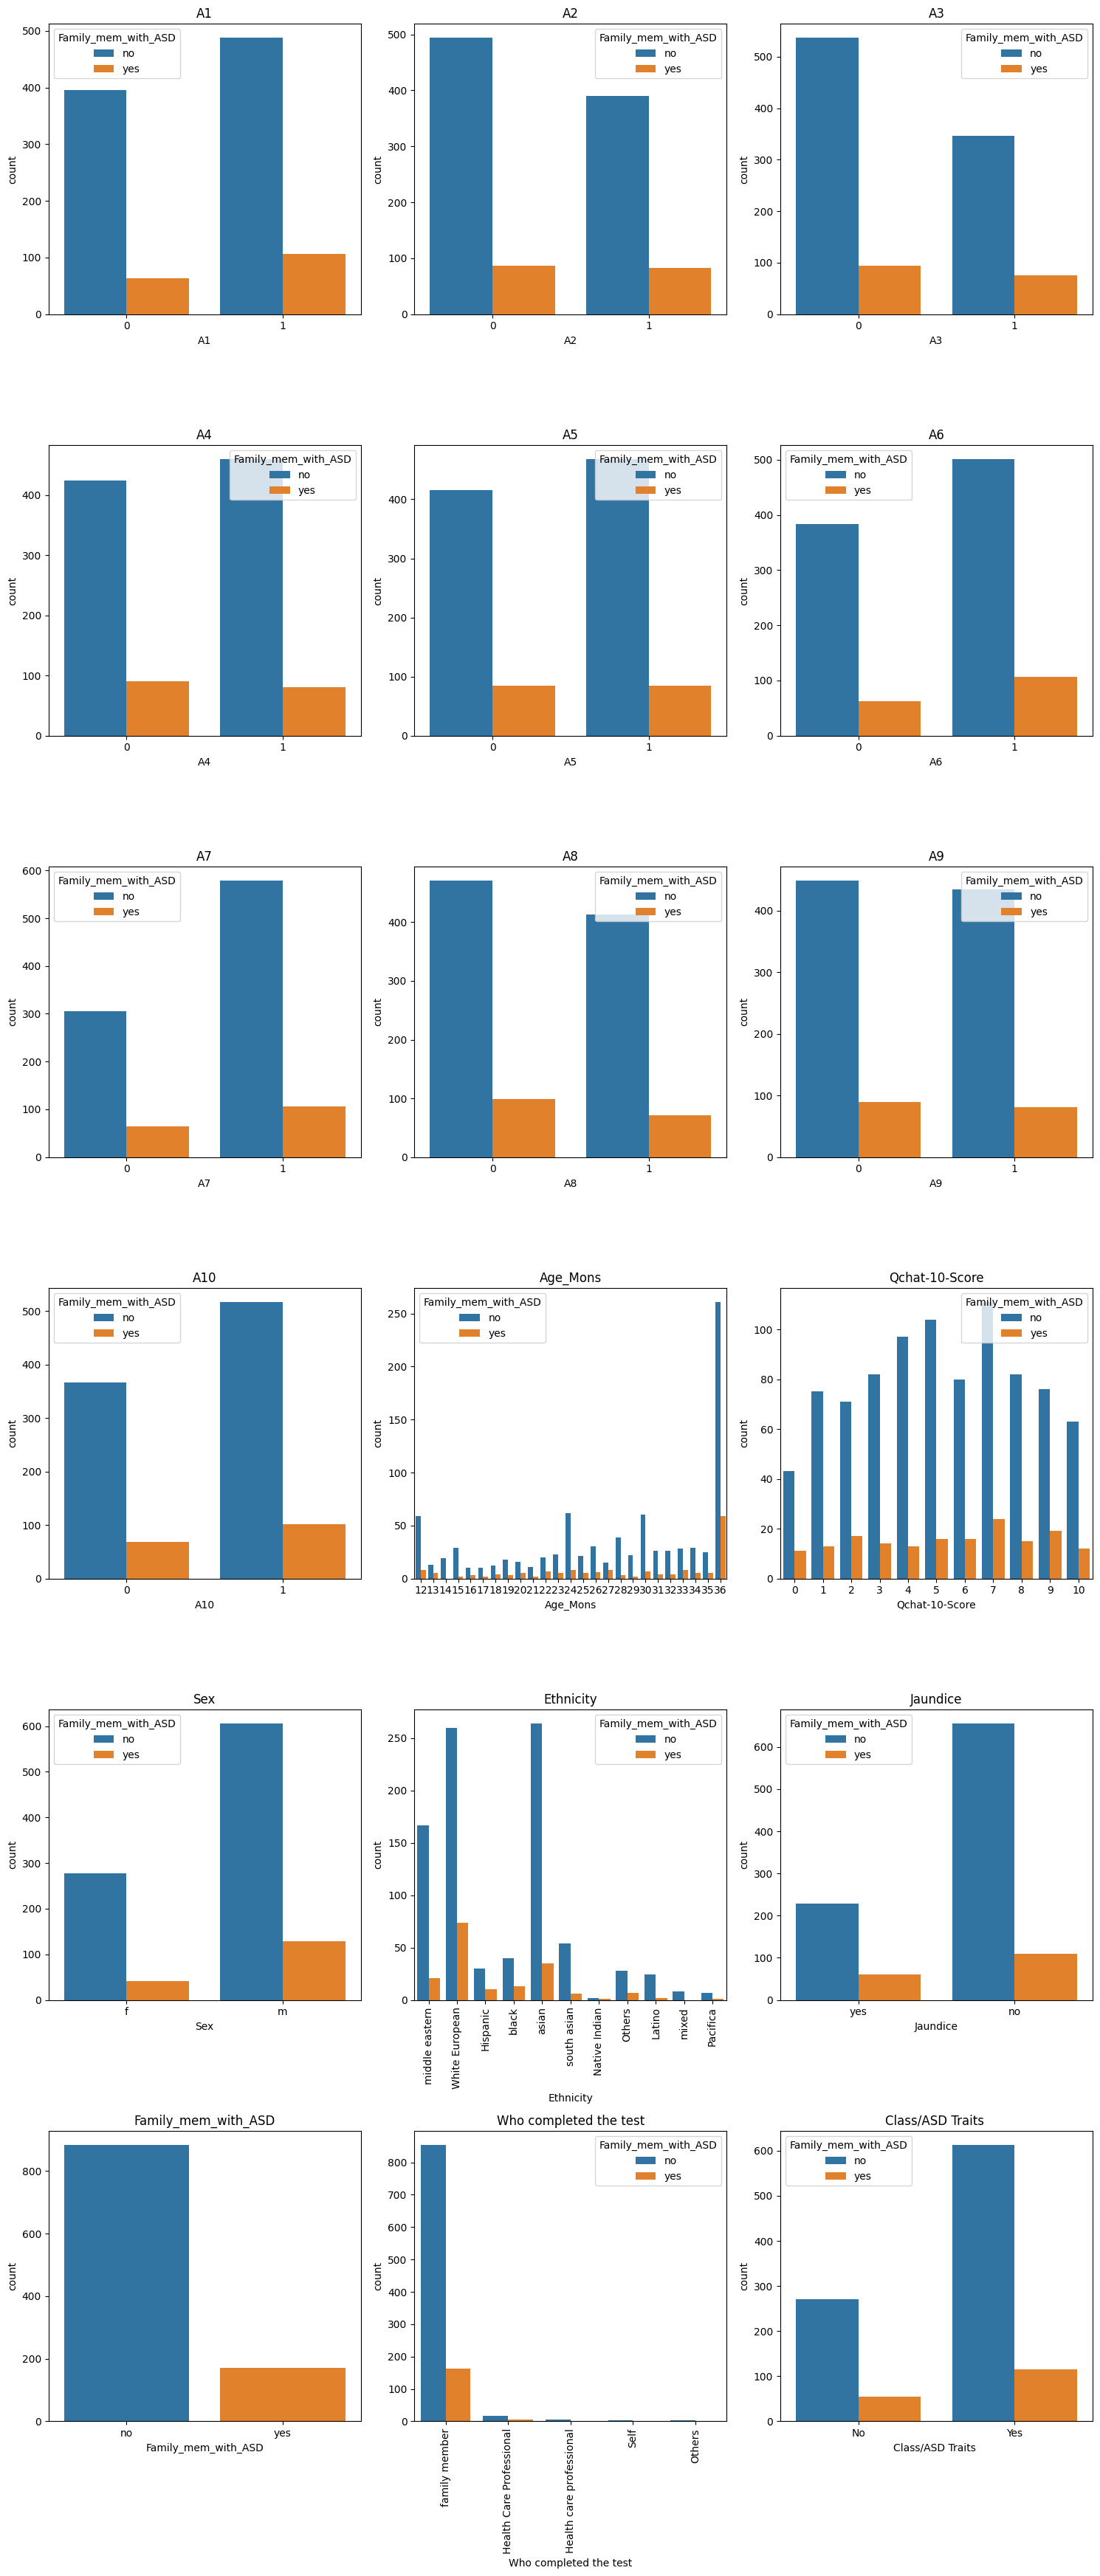

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Family_mem_with_ASD"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [ ]:
data.groupby("Who completed the test").size()

Who completed the test
Health Care Professional      24
Health care professional       5
Others                         3
Self                           4
family member               1018
dtype: int64

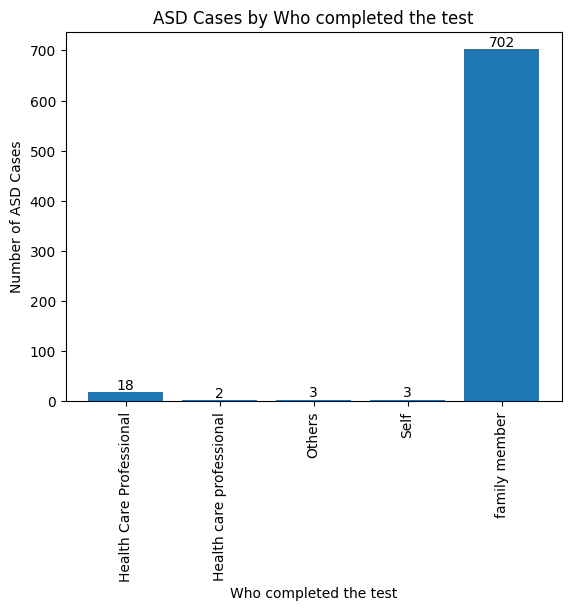

In [ ]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Who completed the test').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Who completed the test')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Who completed the test')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

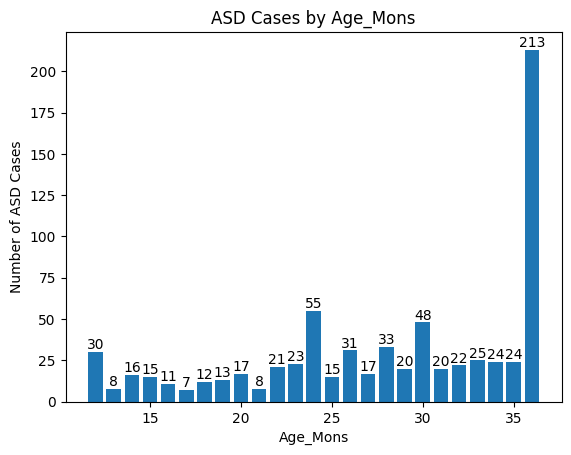

In [ ]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Age_Mons').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age_Mons')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age_Mons')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [ ]:
d = pd.DataFrame()
d["Age"]=(data["Age_Mons"]/12).astype(int)
d["ASD"]=data['Class/ASD Traits ']

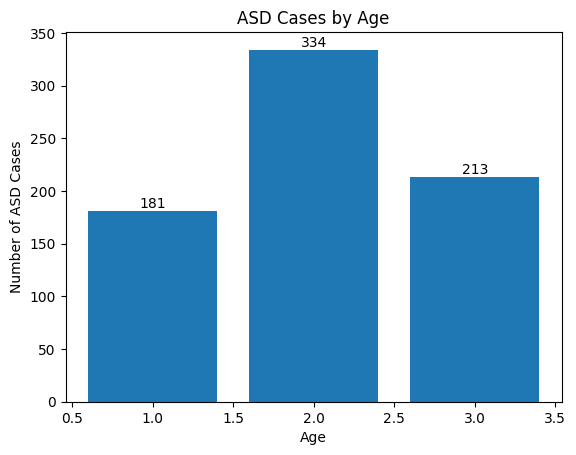

In [ ]:
asd_counts = d[d['ASD'] == 'Yes'].groupby('Age').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

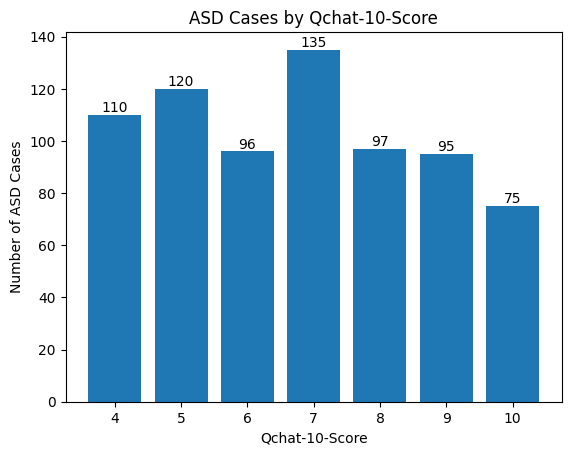

In [ ]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Qchat-10-Score').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Qchat-10-Score')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Qchat-10-Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xticks()
plt.show()

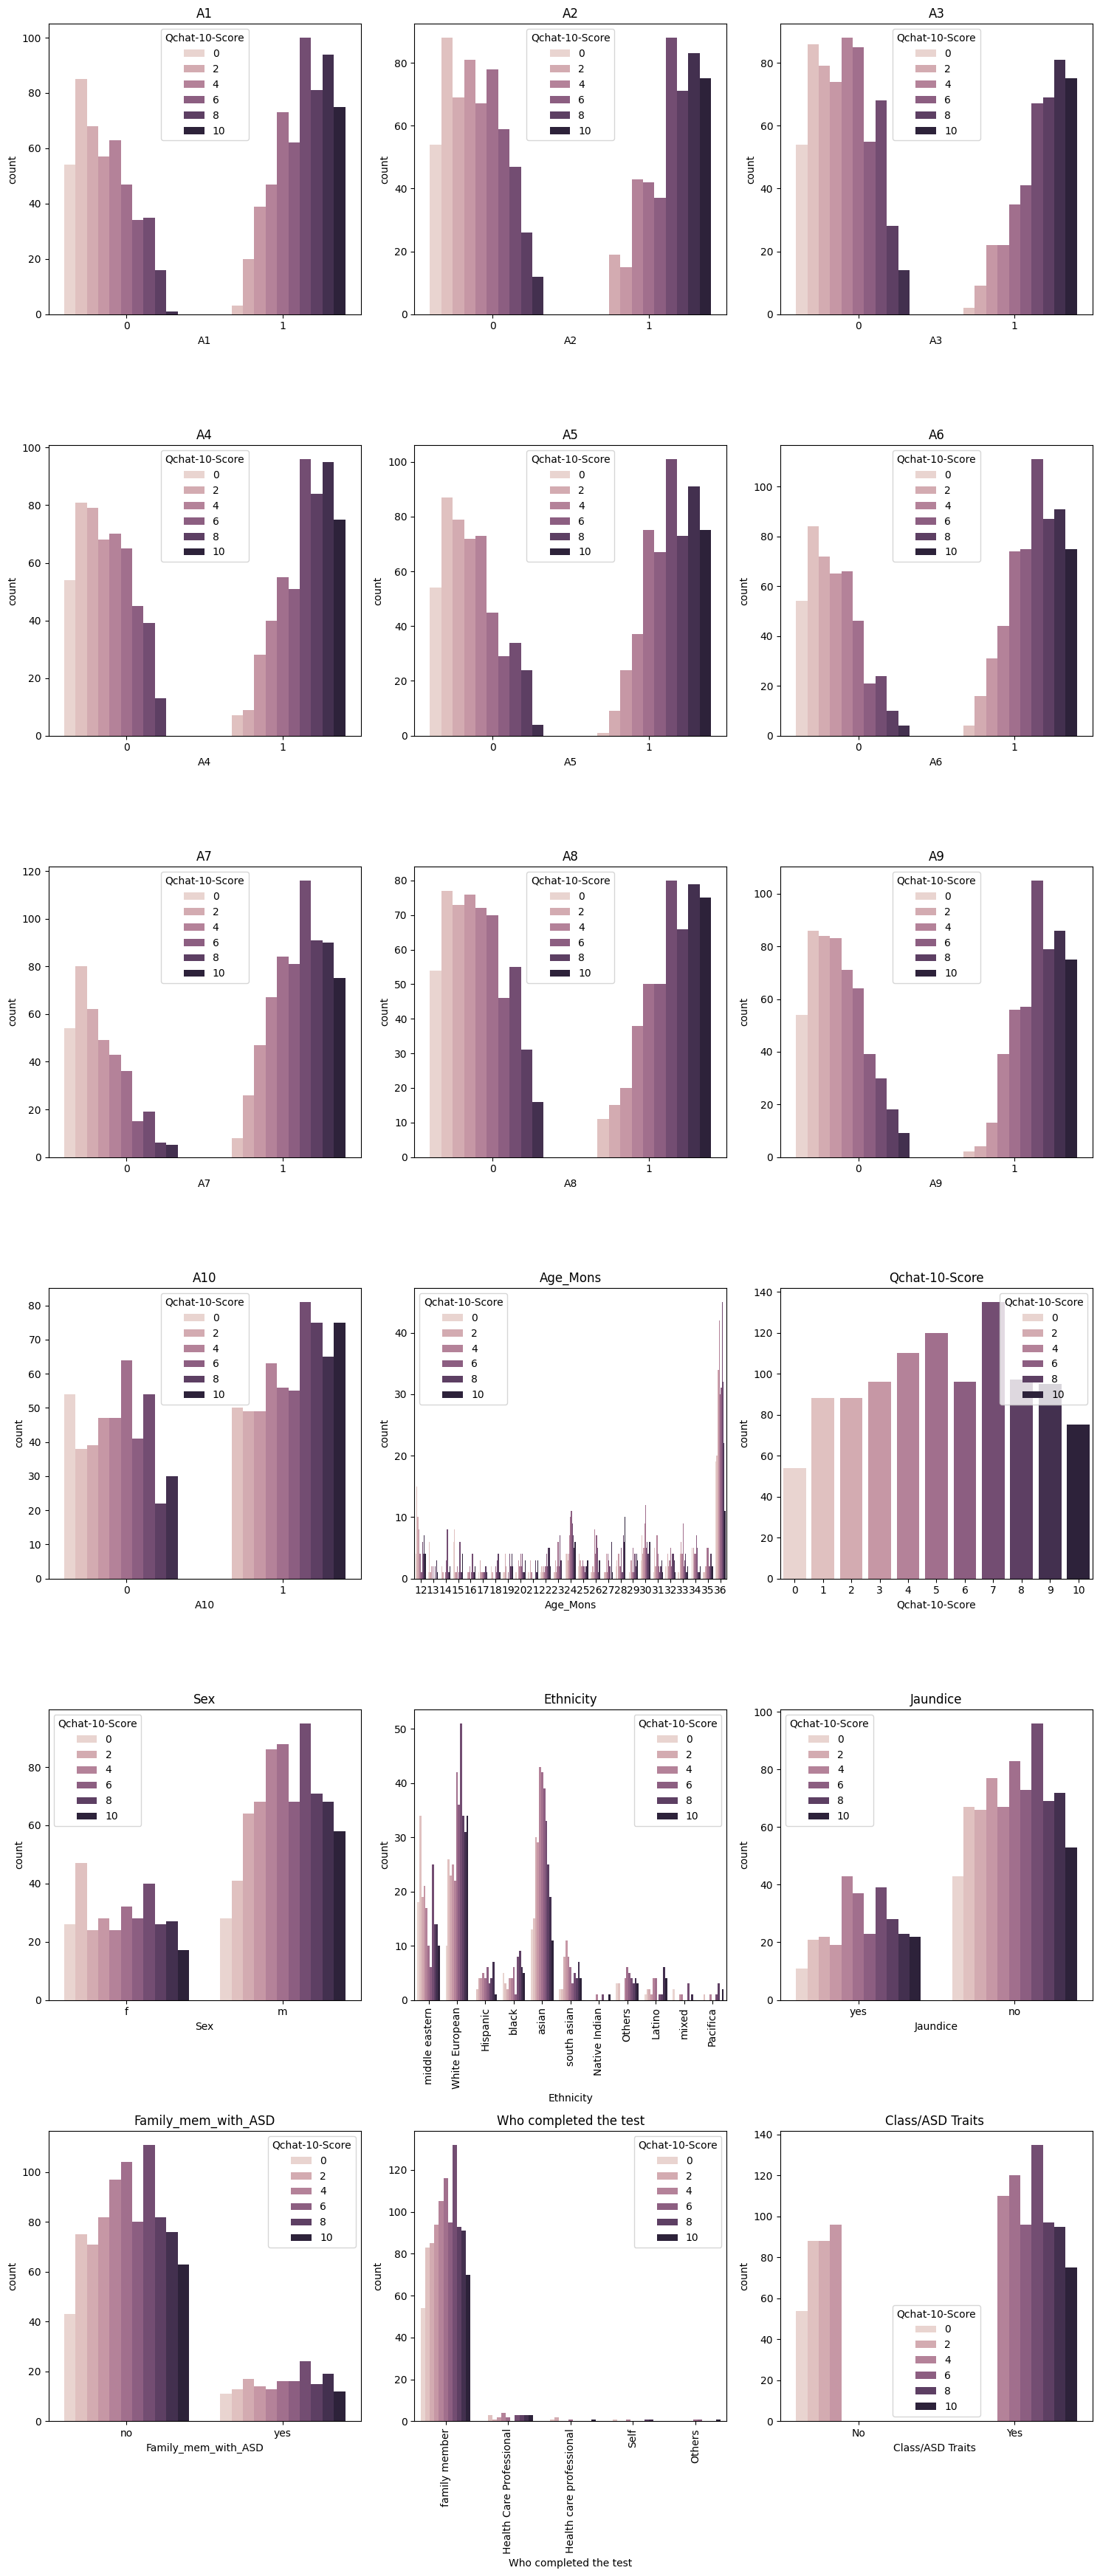

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Qchat-10-Score"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

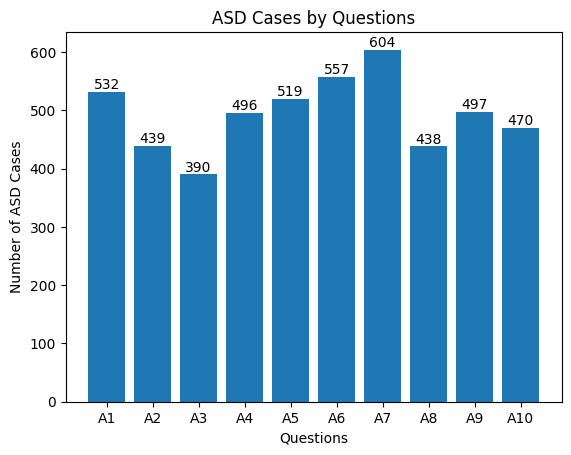

In [ ]:
df=data[data['Class/ASD Traits '] == 'Yes']
sums=df[['A1', 'A2', 'A3', 'A4','A5','A6','A7','A8','A9','A10']].sum()
bars=plt.bar(sums.index,sums.values)
plt.xlabel('Questions')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Questions')
plt.xticks(ticks=range(len(sums.index)), labels=sums.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
d1 = pd.read_csv("Toddler Autism dataset July 2018.csv")
d1.head()

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

In [ ]:
d1.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [ ]:
d1["Age_Mons"]=(d1["Age_Mons"]/12).astype(int)
d1.head()

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1         2               3   
1        2   1   1   0   0   0   1   1   0   0    0         3               4   
2        3   1   0   0   0   0   0   1   1   0    1         3               4   
3        4   1   1   1   1   1   1   1   1   1    1         2              10   
4        5   1   1   0   1   1   1   1   1   1    1         1               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

In [ ]:
d2 = pd.read_csv("data_csv.csv")
d2.head()

CASE_NO_PATIENT'S  A1  A2  A3  A4  A5  A6  A7  A8  A9  \
0                  1   0   0   0   0   0   0   1   1   0   
1                  2   1   1   0   0   0   1   1   0   0   
2                  3   1   0   0   0   0   0   1   1   0   
3                  4   1   1   1   1   1   1   1   1   1   
4                  5   1   1   0   1   1   1   1   1   1   

   A10_Autism_Spectrum_Quotient  Social_Responsiveness_Scale  Age_Years  \
0                             1                          3.0          2   
1                             0                          6.0          3   
2                             1                          7.0          3   
3                             1                          1.0          2   
4                             1                          3.0          2   

   Qchat_10_Score Speech Delay/Language Disorder Learning disorder  \
0             3.0                            Yes               Yes   
1             4.0                            Yes               Yes   
2             4.0                            Yes               Yes   
3            10.0                            Yes               Yes   
4             9.0                            Yes               Yes   

  Genetic_Disorders Depression  \
0               Yes        Yes   
1               Yes        Yes   
2               Yes        Yes   
3                No        Yes   
4                No        Yes   

  Global developmental delay/intellectual disability  \
0                                                Yes   
1                                                Yes   
2                                                Yes   
3                                                Yes   
4                                                Yes   

  Social/Behavioural Issues  Childhood Autism Rating Scale Anxiety_disorder  \
0                       Yes                              1              Yes   
1                       Yes                              2              Yes   
2                       Yes                              4              Yes   
3                       Yes                              2              Yes   
4                       Yes                              1              Yes   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   F  middle eastern      Yes                  No          Family Member   
1   M  White European      Yes                  No          Family Member   
2   M  Middle Eastern      Yes                  No          Family Member   
3   M        Hispanic       No                  No          Family Member   
4   F  White European       No                  No          Family Member   

  ASD_traits  
0         No  
1        Yes  
2        Yes  
3        Yes  
4        Yes

In [ ]:
d2.isna().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [ ]:
d2=d2.dropna()

In [ ]:
d2.isna().sum()

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

In [ ]:
d3 = pd.read_csv("autism_screening.csv")
d3.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age gender       ethnicity jundice austim  \
0         1         0          0  26.0      f  White-European      no     no   
1         1         0          1  24.0      m          Latino      no    yes   
2         1         1          1  27.0      m          Latino     yes    yes   
3         1         0          1  35.0      f  White-European      no    yes   
4         1         0          0  40.0      f               ?      no     no   

   contry_of_res used_app_before  result     age_desc relation Class/ASD  
0  United States              no     6.0  18 and more     Self        NO  
1         Brazil              no     5.0  18 and more     Self        NO  
2          Spain              no     8.0  18 and more   Parent       YES  
3  United States              no     6.0  18 and more     Self        NO  
4          Egypt              no     2.0  18 and more        ?        NO

In [ ]:
d3.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
d3=d3.dropna()

In [ ]:
d3.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
d3["age"]=(d3["age"]/12).astype(int)
d3.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jundice austim  \
0         1         0          0    2      f  White-European      no     no   
1         1         0          1    2      m          Latino      no    yes   
2         1         1          1    2      m          Latino     yes    yes   
3         1         0          1    2      f  White-European      no    yes   
4         1         0          0    3      f               ?      no     no   

   contry_of_res used_app_before  result     age_desc relation Class/ASD  
0  United States              no     6.0  18 and more     Self        NO  
1         Brazil              no     5.0  18 and more     Self        NO  
2          Spain              no     8.0  18 and more   Parent       YES  
3  United States              no     6.0  18 and more     Self        NO  
4          Egypt              no     2.0  18 and more        ?        NO

In [ ]:
print(d1.columns)
print(d2.columns)
print(d3.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')
Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 

In [ ]:
d1=d1.iloc[:,1:]
d2=pd.concat([d2.iloc[:,1:11],d2.iloc[:,[12,13,22,23,24,25,26,27]]],axis=1)
d3=pd.concat([d3.iloc[:,0:11],d3.iloc[:,[17,11,12,13,14,19,20]]],axis=1)

In [ ]:
d1.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score Sex  \
0   0   0   0   0   0   0   1   1   0    1         2               3   f   
1   1   1   0   0   0   1   1   0   0    0         3               4   m   
2   1   0   0   0   0   0   1   1   0    1         3               4   m   
3   1   1   1   1   1   1   1   1   1    1         2              10   m   
4   1   1   0   1   1   1   1   1   1    1         1               9   f   

        Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0  middle eastern      yes                  no          family member   
1  White European      yes                  no          family member   
2  middle eastern      yes                  no          family member   
3        Hispanic       no                  no          family member   
4  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

In [ ]:
d2.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  \
0   0   0   0   0   0   0   1   1   0                             1   
1   1   1   0   0   0   1   1   0   0                             0   
2   1   0   0   0   0   0   1   1   0                             1   
3   1   1   1   1   1   1   1   1   1                             1   
4   1   1   0   1   1   1   1   1   1                             1   

   Age_Years  Qchat_10_Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0          2             3.0   F  middle eastern      Yes                  No   
1          3             4.0   M  White European      Yes                  No   
2          3             4.0   M  Middle Eastern      Yes                  No   
3          2            10.0   M        Hispanic       No                  No   
4          2             9.0   F  White European       No                  No   

  Who_completed_the_test ASD_traits  
0          Family Member         No  
1          Family Member        Yes  
2          Family Member        Yes  
3          Family Member        Yes  
4          Family Member        Yes

In [ ]:
d3.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age  result gender       ethnicity jundice  \
0         1         0          0    2     6.0      f  White-European      no   
1         1         0          1    2     5.0      m          Latino      no   
2         1         1          1    2     8.0      m          Latino     yes   
3         1         0          1    2     6.0      f  White-European      no   
4         1         0          0    3     2.0      f               ?      no   

  austim relation Class/ASD  
0     no     Self        NO  
1    yes     Self        NO  
2    yes   Parent       YES  
3    yes     Self        NO  
4     no        ?        NO

In [ ]:
d1.columns = d2.columns
d3.columns = d2.columns

In [ ]:
d1.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  \
0   0   0   0   0   0   0   1   1   0                             1   
1   1   1   0   0   0   1   1   0   0                             0   
2   1   0   0   0   0   0   1   1   0                             1   
3   1   1   1   1   1   1   1   1   1                             1   
4   1   1   0   1   1   1   1   1   1                             1   

   Age_Years  Qchat_10_Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0          2               3   f  middle eastern      yes                  no   
1          3               4   m  White European      yes                  no   
2          3               4   m  middle eastern      yes                  no   
3          2              10   m        Hispanic       no                  no   
4          1               9   f  White European       no                 yes   

  Who_completed_the_test ASD_traits  
0          family member         No  
1          family member        Yes  
2          family member        Yes  
3          family member        Yes  
4          family member        Yes

In [ ]:
d2.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  \
0   0   0   0   0   0   0   1   1   0                             1   
1   1   1   0   0   0   1   1   0   0                             0   
2   1   0   0   0   0   0   1   1   0                             1   
3   1   1   1   1   1   1   1   1   1                             1   
4   1   1   0   1   1   1   1   1   1                             1   

   Age_Years  Qchat_10_Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0          2             3.0   F  middle eastern      Yes                  No   
1          3             4.0   M  White European      Yes                  No   
2          3             4.0   M  Middle Eastern      Yes                  No   
3          2            10.0   M        Hispanic       No                  No   
4          2             9.0   F  White European       No                  No   

  Who_completed_the_test ASD_traits  
0          Family Member         No  
1          Family Member        Yes  
2          Family Member        Yes  
3          Family Member        Yes  
4          Family Member        Yes

In [ ]:
d3.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  \
0   1   1   1   1   0   0   1   1   0                             0   
1   1   1   0   1   0   0   0   1   0                             1   
2   1   1   0   1   1   0   1   1   1                             1   
3   1   1   0   1   0   0   1   1   0                             1   
4   1   0   0   0   0   0   0   1   0                             0   

   Age_Years  Qchat_10_Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0          2             6.0   f  White-European       no                  no   
1          2             5.0   m          Latino       no                 yes   
2          2             8.0   m          Latino      yes                 yes   
3          2             6.0   f  White-European       no                 yes   
4          3             2.0   f               ?       no                  no   

  Who_completed_the_test ASD_traits  
0                   Self         NO  
1                   Self         NO  
2                 Parent        YES  
3                   Self         NO  
4                      ?         NO

In [ ]:
for i in d1.columns:
    print(i)
    print(f"{d1[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[2 3 1]

Qchat_10_Score
[ 3  4 10  9  8  5  6  2  0  7  1]

Sex
['f' 'm']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']

Jaundice
['yes' 'no']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']

ASD_traits
['No' 'Yes']



In [ ]:
for i in d2.columns:
    print(i)
    print(f"{d2[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  7.  0.  1.]

Sex
['F' 'M']

Ethnicity
['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']

Jaundice
['Yes' 'No']

Family_mem_with_ASD
['No' 'Yes']

Who_completed_the_test
['Family Member' 'Health Care Professional' 'Self' 'Family member'
 'Others' 'School and NGO']

ASD_traits
['No' 'Yes']



In [ ]:
for i in d3.columns:
    print(i)
    print(f"{d3[i].unique()}\n")

A1
[1 0]

A2
[1 0]

A3
[1 0]

A4
[1 0]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[0 1]

Age_Years
[ 2  3  1  5  4 31]

Qchat_10_Score
[ 6.  5.  8.  2.  9. 10.  4.  3.  0.  1.  7.]

Sex
['f' 'm']

Ethnicity
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

Jaundice
['no' 'yes']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['Self' 'Parent' '?' 'Health care professional' 'Relative' 'Others']

ASD_traits
['NO' 'YES']



In [ ]:
data=pd.concat([d1,d2,d3],axis=0)
data.head()
num_columns = data.shape[1]
print(f"DataFrame'in sütun sayısı: {num_columns}")

DataFrame'in sütun sayısı: 18


In [ ]:
column_names = data.columns
print("Sütun isimleri:")
print(column_names)


Sütun isimleri:
Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Qchat_10_Score', 'Sex',
       'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who_completed_the_test', 'ASD_traits'],
      dtype='object')


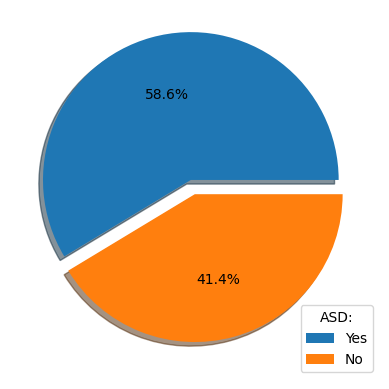

In [ ]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('ASD_traits').size().reindex(labels), explode=myexplode, shadow=True, autopct='%1.1f%%')
plt.legend(title="ASD:", labels=labels)
plt.show()


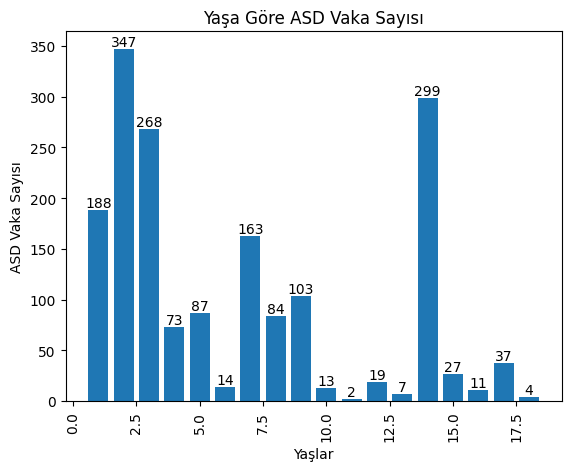

In [ ]:
asd_counts = data[data['ASD_traits'] == 'Yes'].groupby('Age_Years').size()
bars = plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Yaşlar')
plt.ylabel('ASD Vaka Sayısı')
plt.title('Yaşa Göre ASD Vaka Sayısı')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()


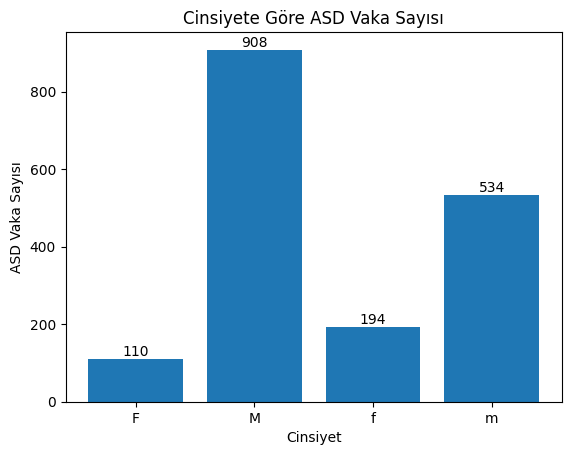

In [ ]:
asd_counts_sex = data[data['ASD_traits'] == 'Yes'].groupby('Sex').size()
bars=plt.bar(asd_counts_sex.index, asd_counts_sex.values)
plt.xlabel('Cinsiyet')
plt.ylabel('ASD Vaka Sayısı')
plt.title('Cinsiyete Göre ASD Vaka Sayısı')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()


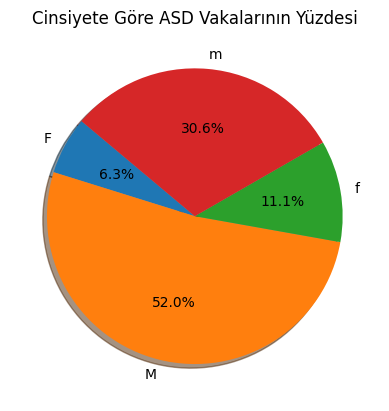

In [ ]:
asd_counts_sex = data[data['ASD_traits'] == 'Yes'].groupby('Sex').size()

# Cinsiyete göre toplam ASD vakalarının sayısı
total_cases = asd_counts_sex.sum()

# Cinsiyete göre ASD vakalarının yüzdesi
percentages = (asd_counts_sex / total_cases) * 100

# Pie chart
plt.pie(percentages, labels=asd_counts_sex.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Cinsiyete Göre ASD Vakalarının Yüzdesi')
plt.show()


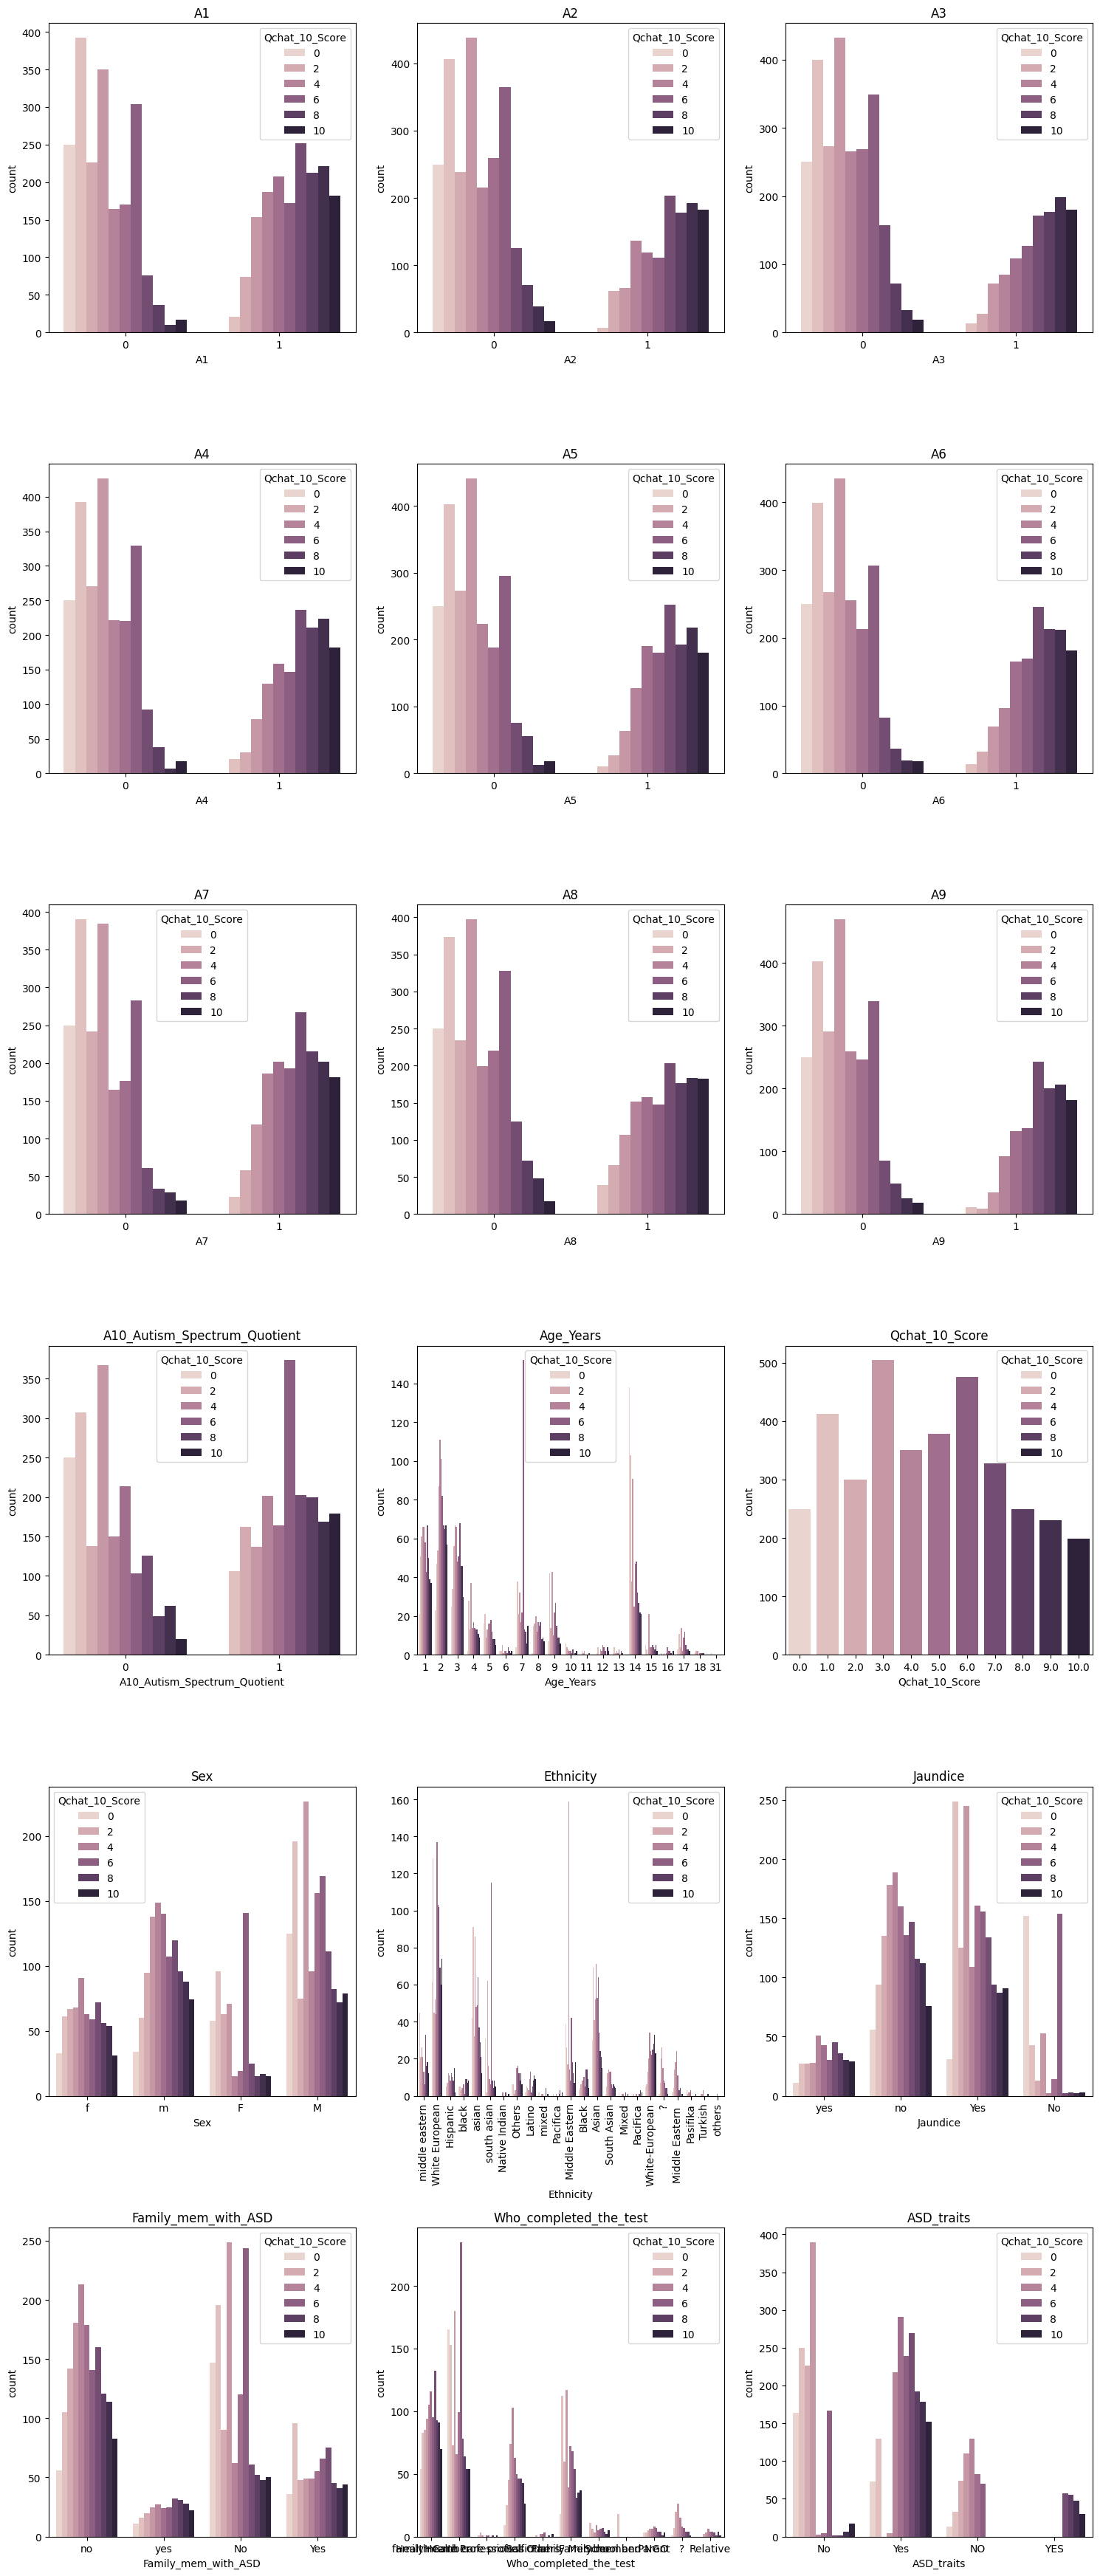

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Qchat_10_Score"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for i in data.columns:
    print(i)
    print(f"{data[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]

Sex
['f' 'm' 'F' 'M']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica'
 'Middle Eastern' 'Black' 'Asian' 'South Asian' 'Mixed' 'PaciFica'
 'White-European' '?' 'Middle Eastern ' 'Pasifika' 'Turkish' 'others']

Jaundice
['yes' 'no' 'Yes' 'No']

Family_mem_with_ASD
['no' 'yes' 'No' 'Yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others' 'Family Member' 'Family member' 'School and NGO' 'Parent'
 '?' 'Relative']

ASD_traits
['No' 'Yes' 'NO' 'YES']



In [ ]:
replacements = {
    'f': 'F',
    'm': 'M',
}
data['Sex'] = data['Sex'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Jaundice'] = data['Jaundice'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].replace(replacements)
replacements = {
    'YES': 'Yes',
    'NO': 'No',
}
data['ASD_traits'] = data['ASD_traits'].replace(replacements)

In [ ]:
replacements = {
    'middle eastern': 'Middle Eastern',
    'Middle Eastern ': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian',
    'PaciFica':'Pacifica',
    'Pasifika':'Pacifica'

}
data['Ethnicity'] = data['Ethnicity'].replace(replacements)

In [ ]:
replacements = {
    'Health care professional':'Health Care Professional',
    'family member':'Family Member',
    'Family member':'Family Member'
}
data['Who_completed_the_test'] = data['Who_completed_the_test'].replace(replacements)

In [ ]:
for i in data.columns:
    print(i)
    print(f"{data[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]

Sex
['F' 'M']

Ethnicity
['Middle Eastern' 'White European' 'Hispanic' 'Black' 'Asian'
 'South Asian' 'Native Indian' 'Others' 'Latino' 'Mixed' 'Pacifica'
 'White-European' '?' 'Turkish' 'others']

Jaundice
['Yes' 'No']

Family_mem_with_ASD
['No' 'Yes']

Who_completed_the_test
['Family Member' 'Health Care Professional' 'Self' 'Others'
 'School and NGO' 'Parent' '?' 'Relative']

ASD_traits
['No' 'Yes']



In [ ]:
X = data.drop("ASD_traits",axis=1)
y = data["ASD_traits"]

In [ ]:
# One Hot Encoding
X=pd.get_dummies(X,columns=["Ethnicity", "Who_completed_the_test"], drop_first=True)

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
X['Sex']=le.fit_transform(X['Sex'])
X['Jaundice']=le.fit_transform(X['Jaundice'])
X['Family_mem_with_ASD']=le.fit_transform(X['Family_mem_with_ASD'])

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model eğitim fonksiyonu
def train_model(model, X, y):
    # 10 katlı çapraz doğrulama için StratifiedKFold kullanarak değerlendirme
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Modelin çapraz doğrulama ile performansını değerlendirme
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()

    # Confusion matrix hesaplama
    y_pred = cross_val_predict(model, X, y, cv=cv)
    matrix = confusion_matrix(y, y_pred)

    # Skorları bir DataFrame'e kaydetme
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    print(f'{model.__class__.__name__} : ')
    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    print(score_df)
    print()

# Model tanımlamaları
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
          GradientBoostingClassifier(), XGBClassifier(), AdaBoostClassifier(), SVC()]

# Modelleri eğitim ve test verisiyle eğitme ve değerlendirme
for model in models:
    train_model(model, X_train_scaled, y_train)



LogisticRegression : 
Confusion Matrix is: 
[[1264  136]
 [ 159 1384]]


Score Table is: 
   accuracy  precision    recall        f1
0  0.899762   0.910649  0.896959  0.903611

DecisionTreeClassifier : 
Confusion Matrix is: 
[[1368   32]
 [  20 1523]]


Score Table is: 
   accuracy  precision    recall       f1
0   0.98471   0.977722  0.988333  0.98455

RandomForestClassifier : 
Confusion Matrix is: 
[[1378   22]
 [   7 1536]]


Score Table is: 
   accuracy  precision    recall        f1
0  0.990827   0.987183  0.994814  0.991615

GradientBoostingClassifier : 
Confusion Matrix is: 
[[1376   24]
 [   9 1534]]


Score Table is: 
   accuracy  precision   recall        f1
0  0.988782   0.984062  0.99416  0.989349

XGBClassifier : 
Confusion Matrix is: 
[[1384   16]
 [   8 1535]]


Score Table is: 
   accuracy  precision    recall        f1
0  0.991844   0.989767  0.994805  0.992241

AdaBoostClassifier : 
Confusion Matrix is: 
[[1336   64]
 [  73 1470]]


Score Table is: 
   accuracy  preci

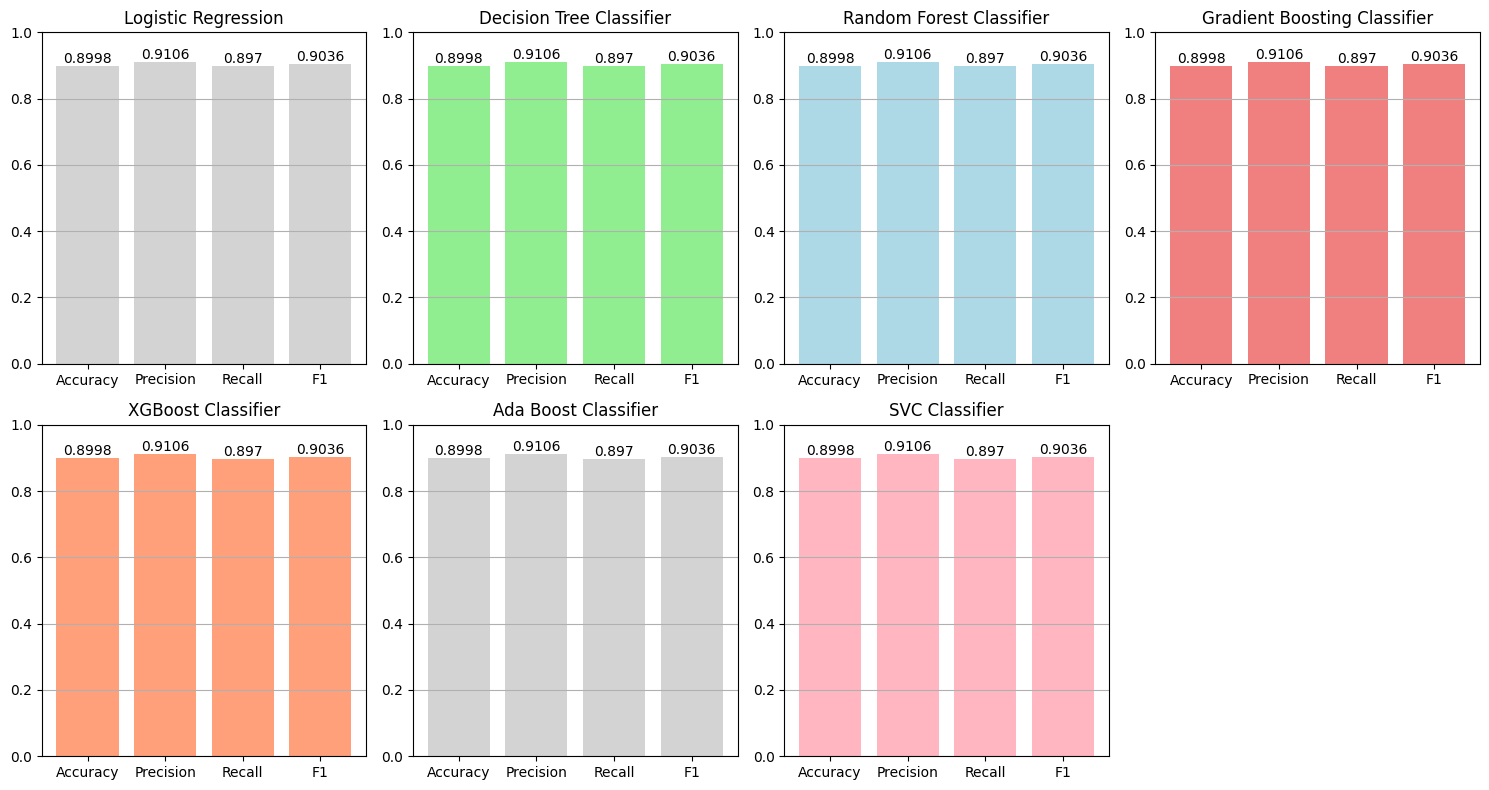

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Örnek DataFrame'ler oluşturalım (bu DataFrame'lerin gerçek verilere göre değiştirilmesi gerekecektir)
logistic_regression_df = pd.DataFrame(columns=["Metric", "Score"])
logistic_regression_df["Metric"] = ["Accuracy", "Precision", "Recall", "F1"]
logistic_regression_df["Score"] = [0.899762, 0.910649, 0.896959, 0.903611]

# Bu örnekte, diğer modellerin DataFrame'lerini oluşturmak yerine, aynı mantığı kullanarak örnek DataFrame'leri kopyalayacağız.
decision_tree_df = logistic_regression_df.copy()
random_forest_df = logistic_regression_df.copy()
gradient_boosting_df = logistic_regression_df.copy()
xgboost_df = logistic_regression_df.copy()
ada_boost_df = logistic_regression_df.copy()
svc_df = logistic_regression_df.copy()

# Modellerin performansını görselleştirme
plt.figure(figsize=(15, 8))

# Logistic Regression
plt.subplot(2, 4, 1)
bars = plt.bar(logistic_regression_df["Metric"], logistic_regression_df["Score"], color='lightgray')
plt.title("Logistic Regression", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Decision Tree
plt.subplot(2, 4, 2)
bars = plt.bar(decision_tree_df["Metric"], decision_tree_df["Score"], color='lightgreen')
plt.title("Decision Tree Classifier", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Random Forest
plt.subplot(2, 4, 3)
bars = plt.bar(random_forest_df["Metric"], random_forest_df["Score"], color='lightblue')
plt.title("Random Forest Classifier", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Gradient Boosting
plt.subplot(2, 4, 4)
bars = plt.bar(gradient_boosting_df["Metric"], gradient_boosting_df["Score"], color='lightcoral')
plt.title("Gradient Boosting Classifier", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# XGBoost
plt.subplot(2, 4, 5)
bars = plt.bar(xgboost_df["Metric"], xgboost_df["Score"], color='lightsalmon')
plt.title("XGBoost Classifier", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Ada Boost
plt.subplot(2, 4, 6)
bars = plt.bar(ada_boost_df["Metric"], ada_boost_df["Score"], color='lightgray')
plt.title("Ada Boost Classifier", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# SVC
plt.subplot(2, 4, 7)
bars = plt.bar(svc_df["Metric"], svc_df["Score"], color='lightpink')
plt.title("SVC Classifier", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()


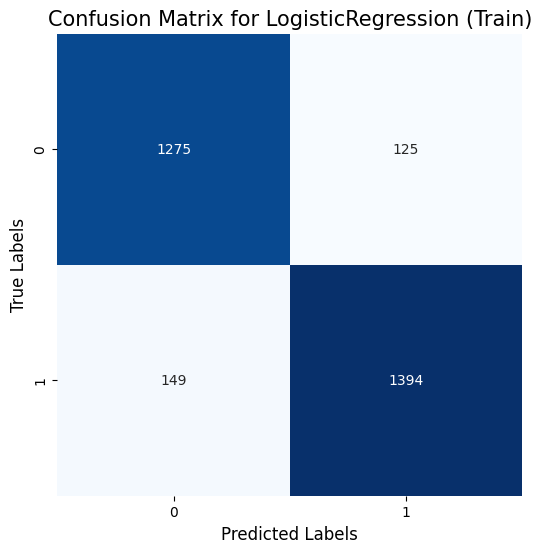

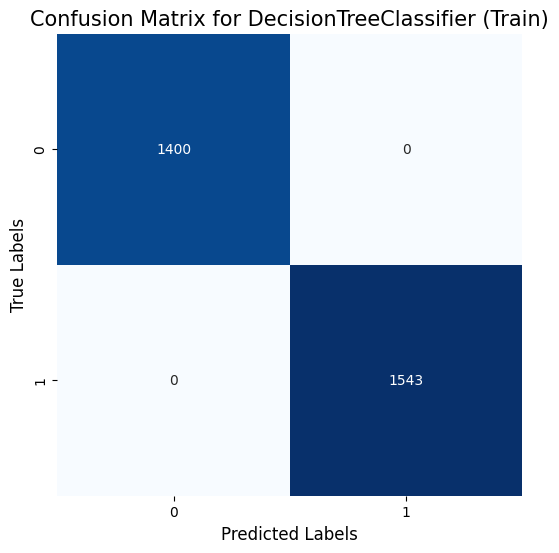

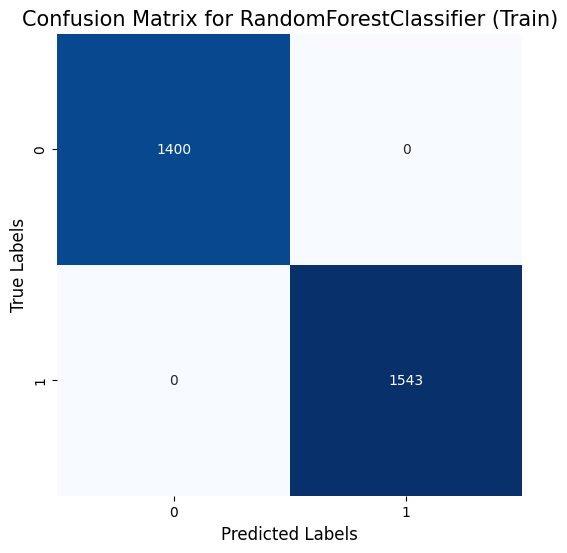

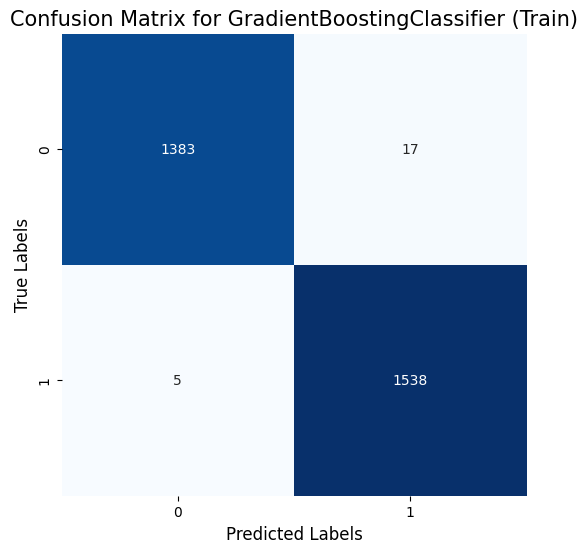

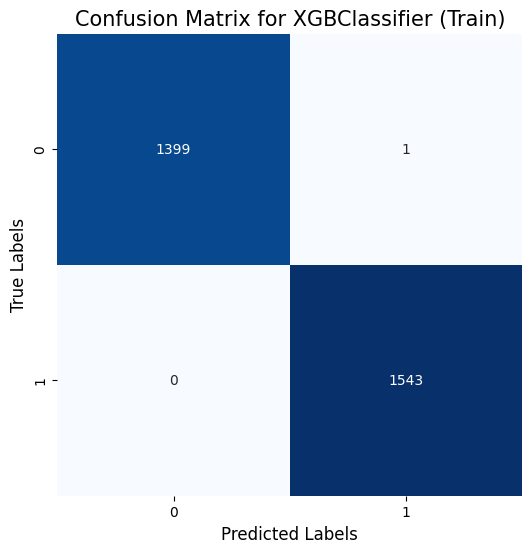

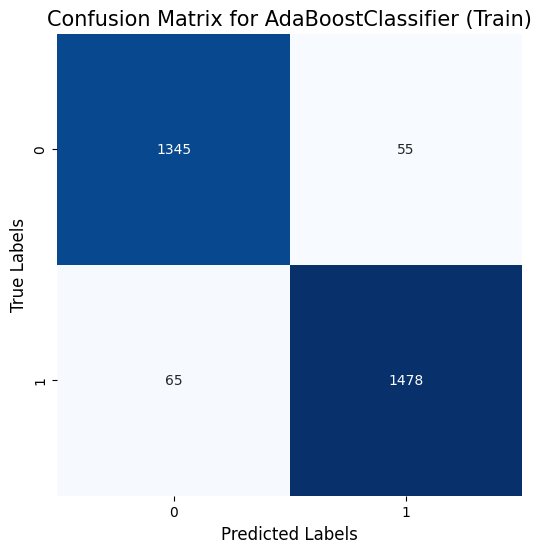

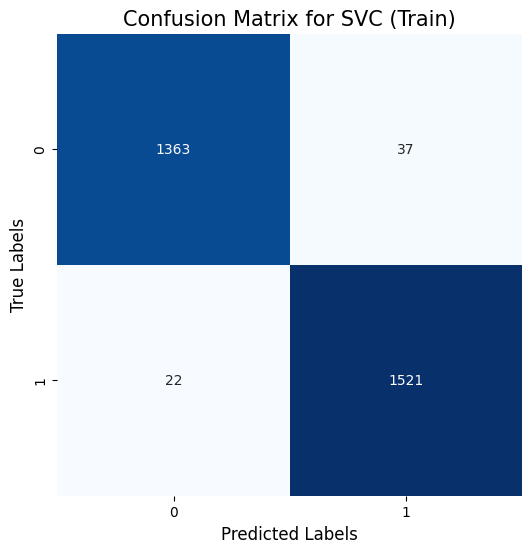

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her bir model için eğitilmiş model ve isimlerin bir listesini oluşturma
trained_models = [model.fit(X_train_scaled, y_train) for model in models]
model_names = [model.__class__.__name__ for model in models]

# Her bir model için confusion matrix oluşturma
for model, model_name in zip(trained_models, model_names):
    y_pred_train = model.predict(X_train_scaled)
    matrix_train = confusion_matrix(y_train, y_pred_train)

    # Confusion matrix'i görselleştirme
    plt.figure(figsize=(6, 6))
    sns.heatmap(matrix_train, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix for {model_name} (Train)', fontsize=15)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.show()


In [ ]:
total_data_count = data.shape[0]
print("Toplam veri sayısı:", total_data_count)


Toplam veri sayısı: 3679


In [ ]:
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (2943, 36)
Test seti boyutu: (736, 36)


In [ ]:
from sklearn.metrics import confusion_matrix

# Modeli eğit
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


[[314  30]
 [ 29 363]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(title)
    plt.show()


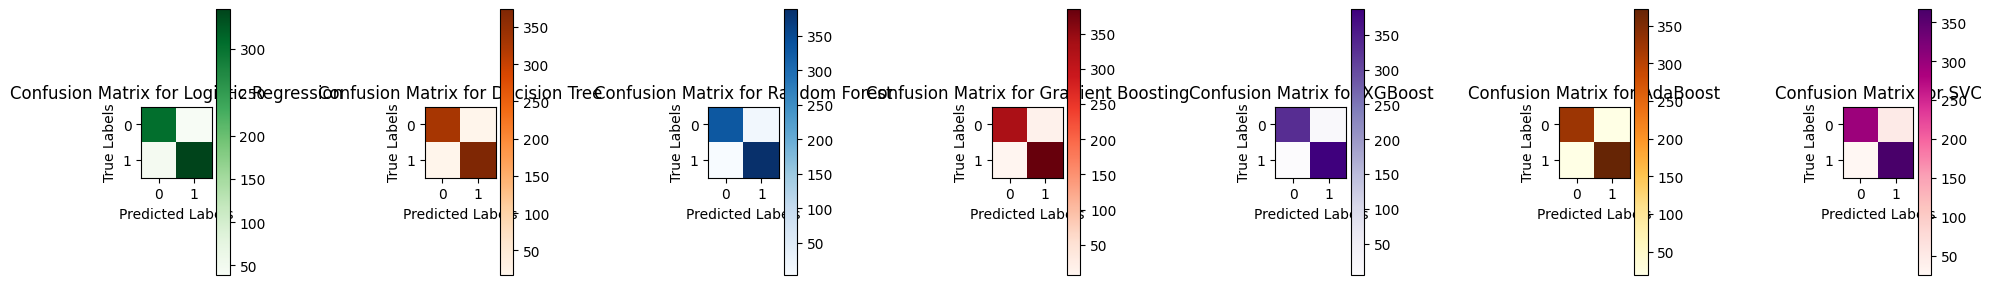

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Her bir model için tahminleri ve confusion matrix'leri oluşturma
y_pred_logistic = cross_val_predict(LogisticRegression(), X_test_scaled, y_test, cv=10)
matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

y_pred_decision_tree = cross_val_predict(DecisionTreeClassifier(), X_test_scaled, y_test, cv=10)
matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

y_pred_random_forest = cross_val_predict(RandomForestClassifier(), X_test_scaled, y_test, cv=10)
matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

y_pred_gradient_boosting = cross_val_predict(GradientBoostingClassifier(), X_test_scaled, y_test, cv=10)
matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)

y_pred_xgboost = cross_val_predict(XGBClassifier(), X_test_scaled, y_test, cv=10)
matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)

y_pred_ada_boost = cross_val_predict(AdaBoostClassifier(), X_test_scaled, y_test, cv=10)
matrix_ada_boost = confusion_matrix(y_test, y_pred_ada_boost)

y_pred_svc = cross_val_predict(SVC(), X_test_scaled, y_test, cv=10)
matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Confusion matrix'leri yan yana görselleştirme
plt.figure(figsize=(20, 10))

plt.subplot(1, 14, 1)
plt.title("Confusion Matrix for Logistic Regression")
plt.imshow(matrix_logistic, cmap='Greens', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 14, 3)
plt.title("Confusion Matrix for Decision Tree")
plt.imshow(matrix_decision_tree, cmap='Oranges', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 14, 5)
plt.title("Confusion Matrix for Random Forest")
plt.imshow(matrix_random_forest, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 14, 7)
plt.title("Confusion Matrix for Gradient Boosting")
plt.imshow(matrix_gradient_boosting, cmap='Reds', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 14, 9)
plt.title("Confusion Matrix for XGBoost")
plt.imshow(matrix_xgboost, cmap='Purples', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 14, 11)
plt.title("Confusion Matrix for AdaBoost")
plt.imshow(matrix_ada_boost, cmap='YlOrBr', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 14, 13)
plt.title("Confusion Matrix for SVC")
plt.imshow(matrix_svc, cmap='RdPu', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplots_adjust(wspace=0.1)  # Yatay aralık ayarı
plt.tight_layout()
plt.show()





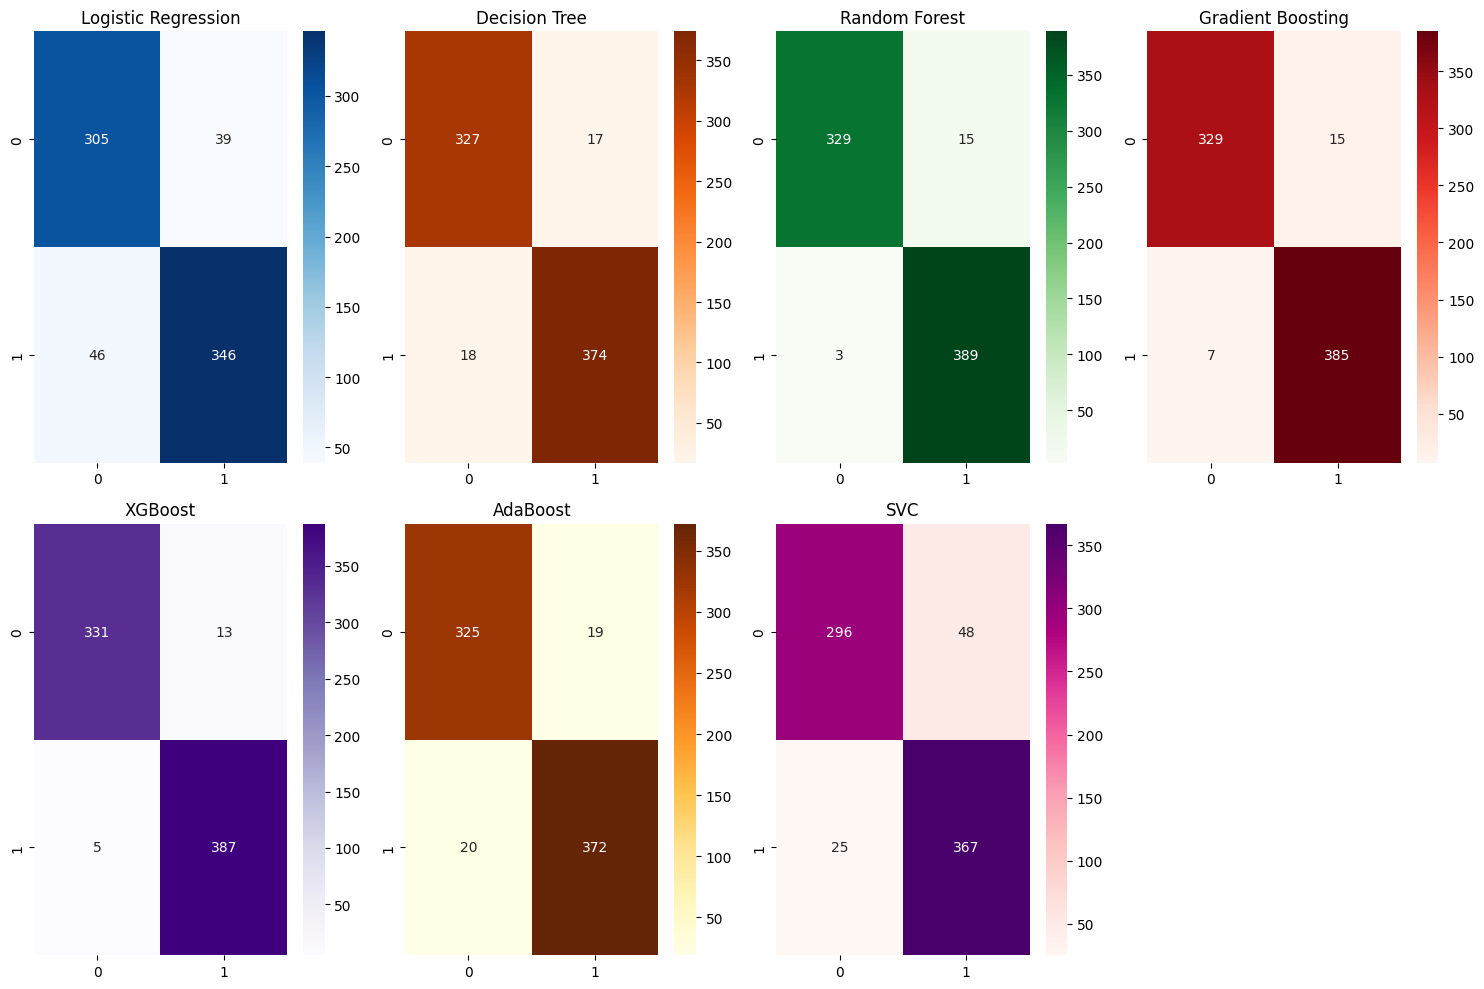

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix'leri görselleştirme
plt.figure(figsize=(15, 10))

# Logistic Regression
plt.subplot(2, 4, 1)
sns.heatmap(matrix_logistic, annot=True, cmap='Blues', fmt='g')
plt.title("Logistic Regression")

# Decision Tree
plt.subplot(2, 4, 2)
sns.heatmap(matrix_decision_tree, annot=True, cmap='Oranges', fmt='g')
plt.title("Decision Tree")

# Random Forest
plt.subplot(2, 4, 3)
sns.heatmap(matrix_random_forest, annot=True, cmap='Greens', fmt='g')
plt.title("Random Forest")

# Gradient Boosting
plt.subplot(2, 4, 4)
sns.heatmap(matrix_gradient_boosting, annot=True, cmap='Reds', fmt='g')
plt.title("Gradient Boosting")

# XGBoost
plt.subplot(2, 4, 5)
sns.heatmap(matrix_xgboost, annot=True, cmap='Purples', fmt='g')
plt.title("XGBoost")

# AdaBoost
plt.subplot(2, 4, 6)
sns.heatmap(matrix_ada_boost, annot=True, cmap='YlOrBr', fmt='g')
plt.title("AdaBoost")

# SVC
plt.subplot(2, 4, 7)
sns.heatmap(matrix_svc, annot=True, cmap='RdPu', fmt='g')
plt.title("SVC")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X_test_scaled, y_test, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_test_scaled, y_test, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_test_scaled, y_test, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_test_scaled, y_test, cv=cv, scoring='f1')

    accuracy_mean = accuracy_scores.mean()
    precision_mean = precision_scores.mean()
    recall_mean = recall_scores.mean()
    f1_mean = f1_scores.mean()

    results.append([model.__class__.__name__, accuracy_mean, precision_mean, recall_mean, f1_mean])

# Sonuçları DataFrame'e kaydetme
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

# Sonuçları yazdırma
print(results_df)


                        Model  Accuracy  Precision    Recall        F1
0          LogisticRegression  0.880507   0.894762  0.880000  0.886661
1      DecisionTreeClassifier  0.937468   0.946386  0.941218  0.939560
2      RandomForestClassifier  0.978193   0.965836  0.994872  0.977268
3  GradientBoostingClassifier  0.974195   0.963027  0.989744  0.976038
4               XGBClassifier  0.976897   0.968435  0.989744  0.978656
5          AdaBoostClassifier  0.956553   0.952460  0.966667  0.959211
6                         SVC  0.915772   0.901296  0.946346  0.922825


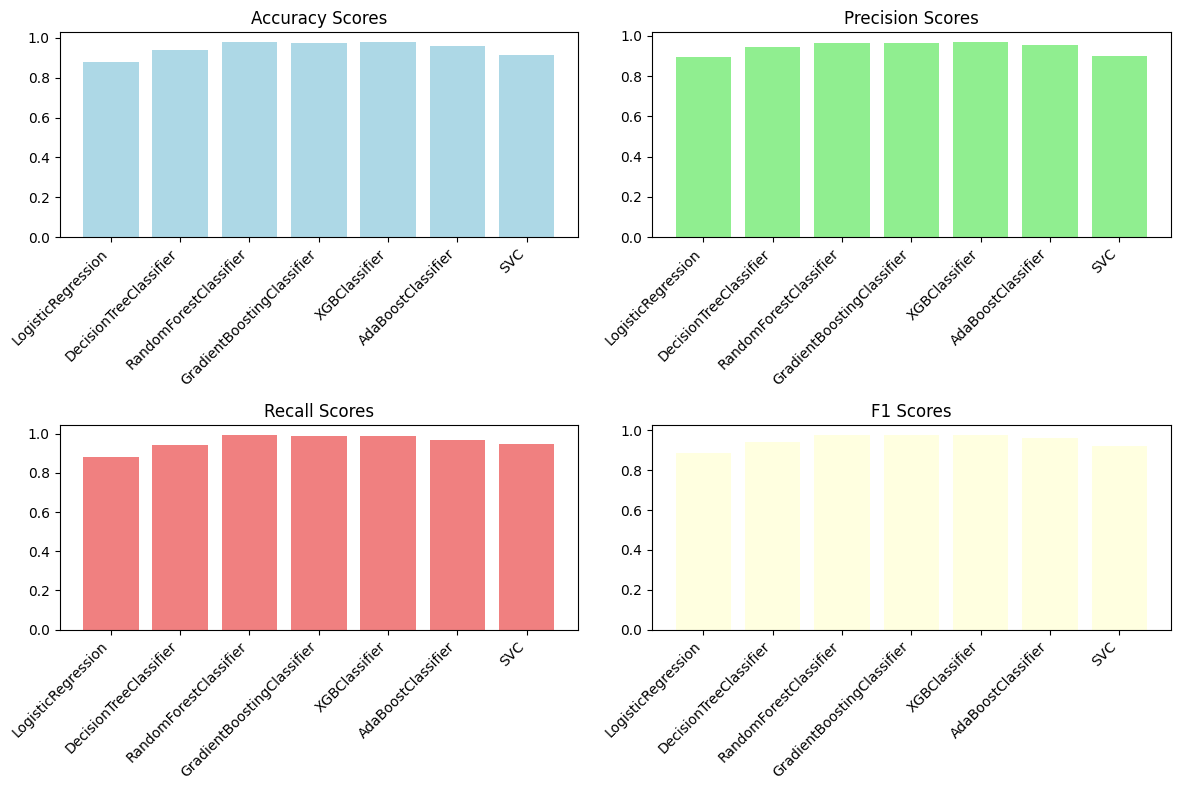

In [ ]:
import matplotlib.pyplot as plt

# Modellerin isimleri
model_names = results_df["Model"]

# Metriklerin değerleri
accuracy_scores = results_df["Accuracy"]
precision_scores = results_df["Precision"]
recall_scores = results_df["Recall"]
f1_scores = results_df["F1"]

# Görselleştirme
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracy_scores, color='lightblue')
plt.title('Accuracy Scores')
plt.xticks(rotation=45, ha='right')

# Precision
plt.subplot(2, 2, 2)
plt.bar(model_names, precision_scores, color='lightgreen')
plt.title('Precision Scores')
plt.xticks(rotation=45, ha='right')

# Recall
plt.subplot(2, 2, 3)
plt.bar(model_names, recall_scores, color='lightcoral')
plt.title('Recall Scores')
plt.xticks(rotation=45, ha='right')

# F1
plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores, color='lightyellow')
plt.title('F1 Scores')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


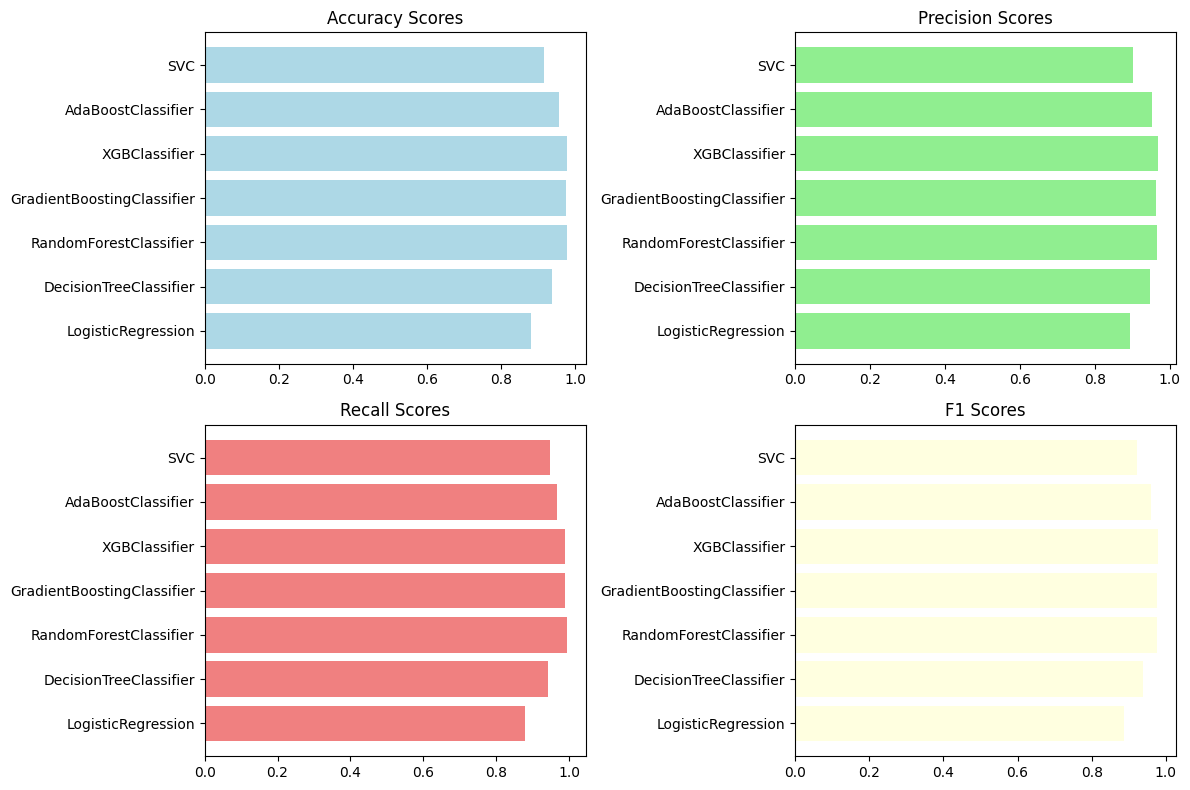

In [ ]:
import matplotlib.pyplot as plt

# Modellerin isimleri
model_names = results_df["Model"]

# Her bir metriğin değerlerini alalım
accuracy_scores = results_df["Accuracy"]
precision_scores = results_df["Precision"]
recall_scores = results_df["Recall"]
f1_scores = results_df["F1"]

# Görselleştirme
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.barh(model_names, accuracy_scores, color='lightblue')
plt.title('Accuracy Scores')

# Precision
plt.subplot(2, 2, 2)
plt.barh(model_names, precision_scores, color='lightgreen')
plt.title('Precision Scores')

# Recall
plt.subplot(2, 2, 3)
plt.barh(model_names, recall_scores, color='lightcoral')
plt.title('Recall Scores')

# F1
plt.subplot(2, 2, 4)
plt.barh(model_names, f1_scores, color='lightyellow')
plt.title('F1 Scores')

plt.tight_layout()
plt.show()


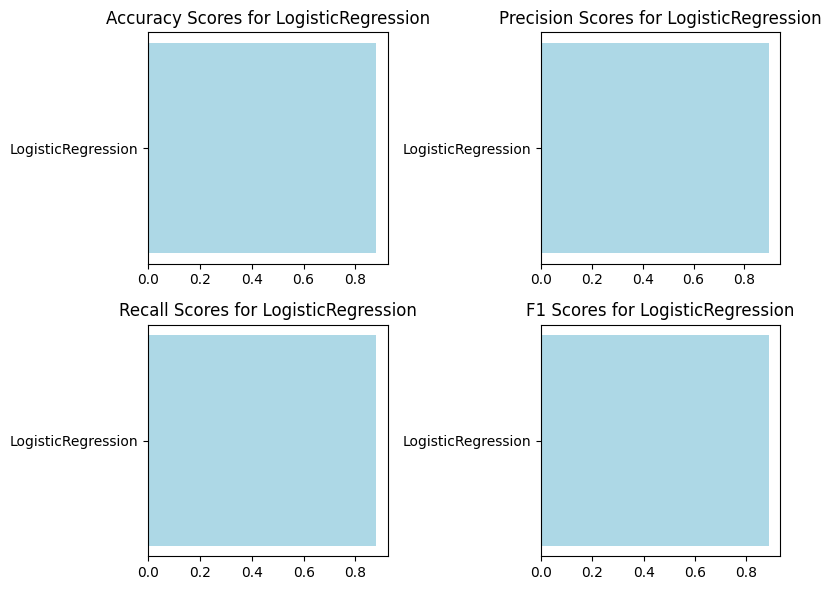

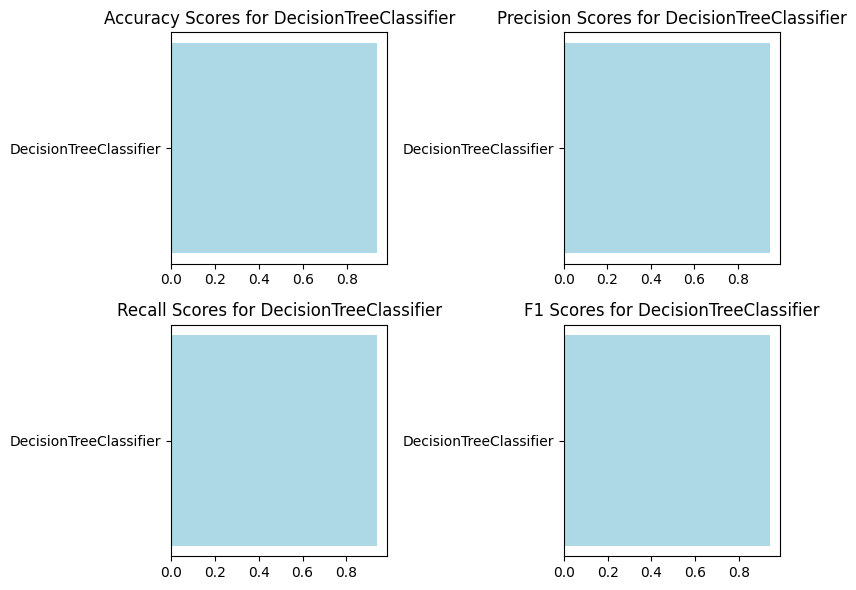

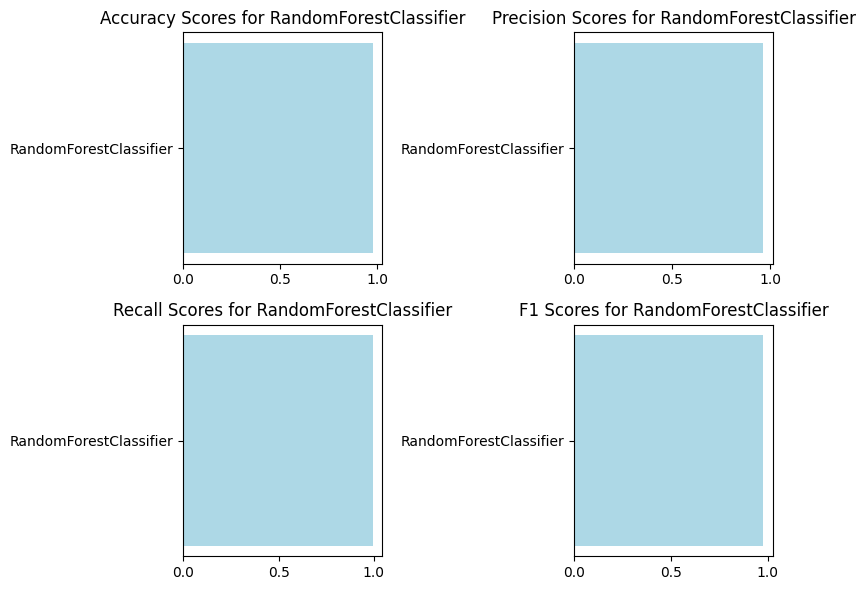

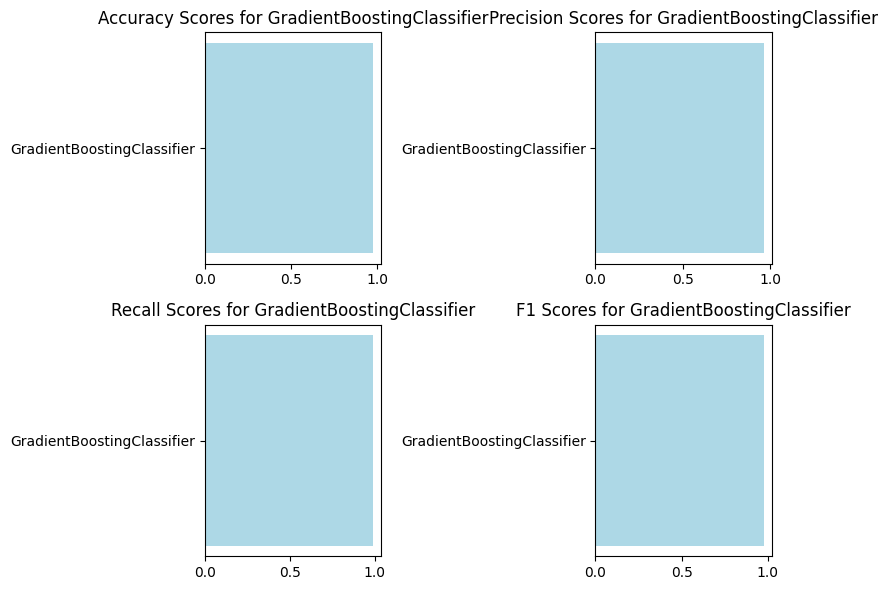

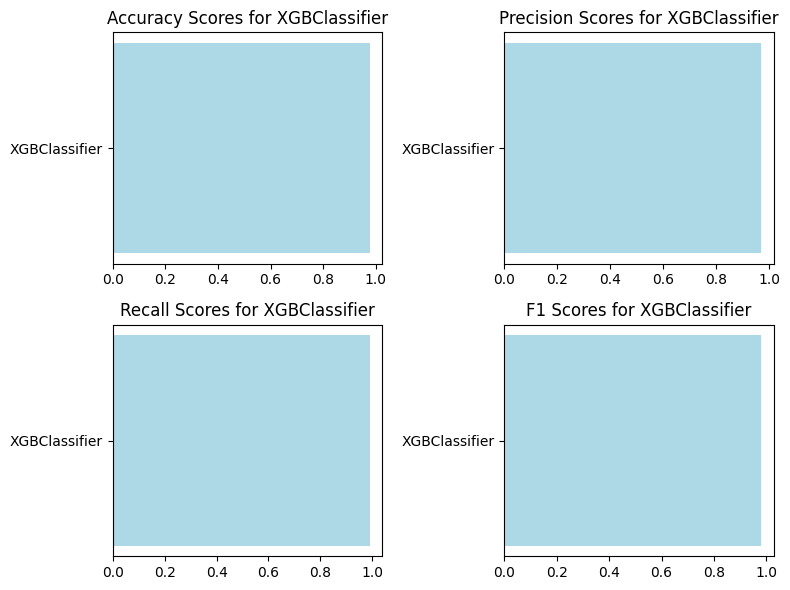

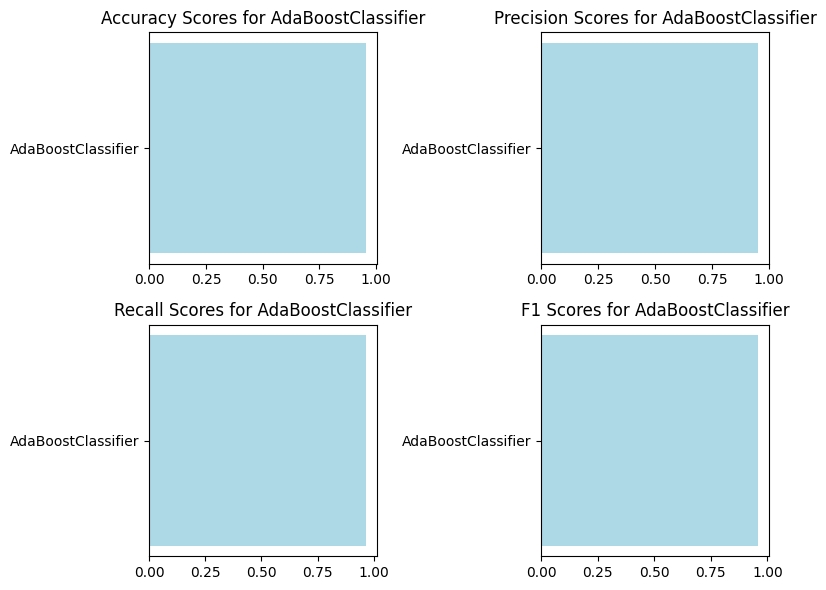

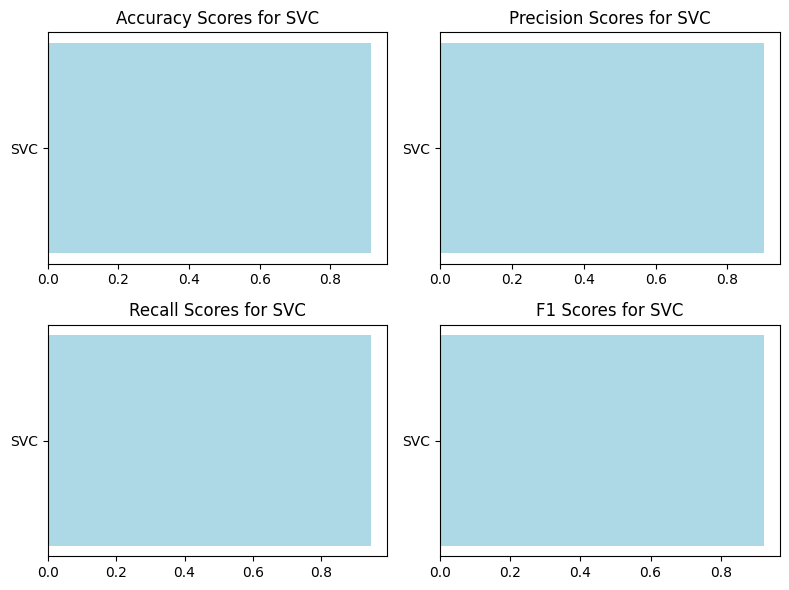

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Modellerin isimleri
model_names = results_df["Model"]

# Metriklerin isimleri
metrics = ["Accuracy", "Precision", "Recall", "F1"]

# Her bir model için ayrı tablolar oluşturma
for model_name in model_names:
    model_data = results_df[results_df["Model"] == model_name]
    plt.figure(figsize=(8, 6))

    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        plt.barh(model_data["Model"], model_data[metric], color='lightblue')
        plt.title(f'{metric} Scores for {model_name}')

    plt.tight_layout()
    plt.show()


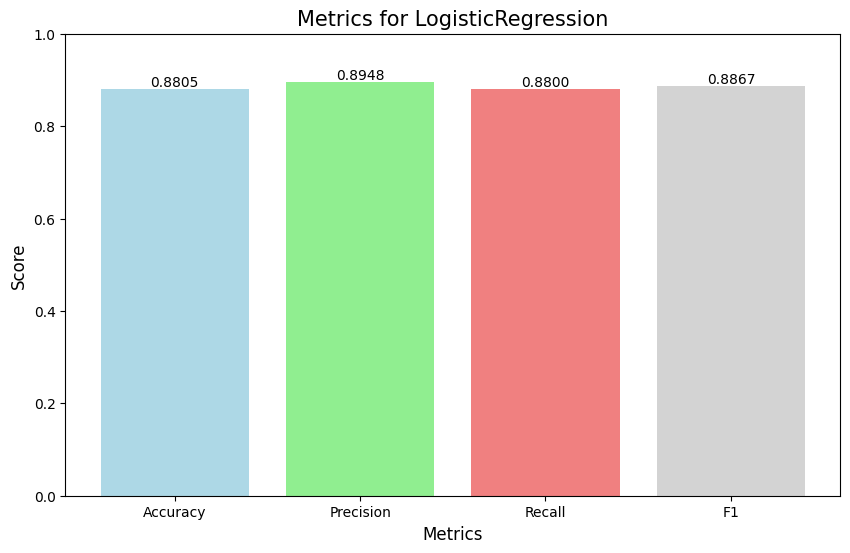

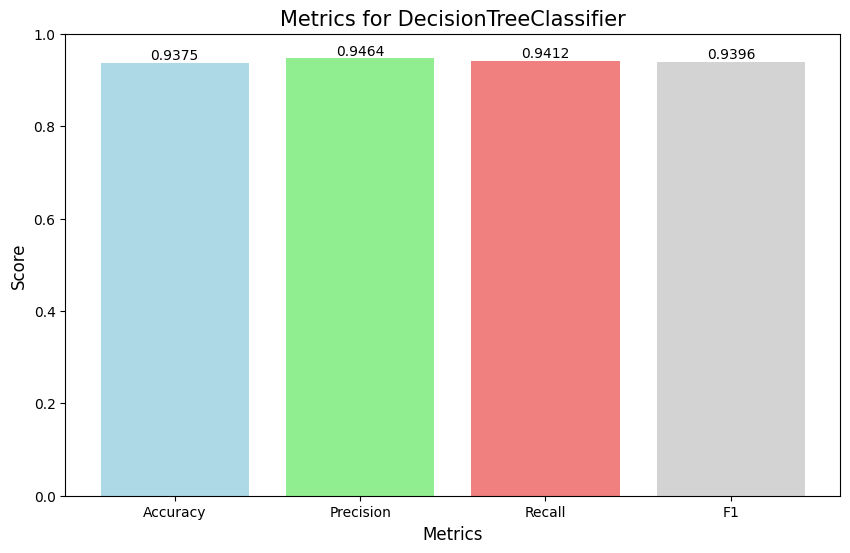

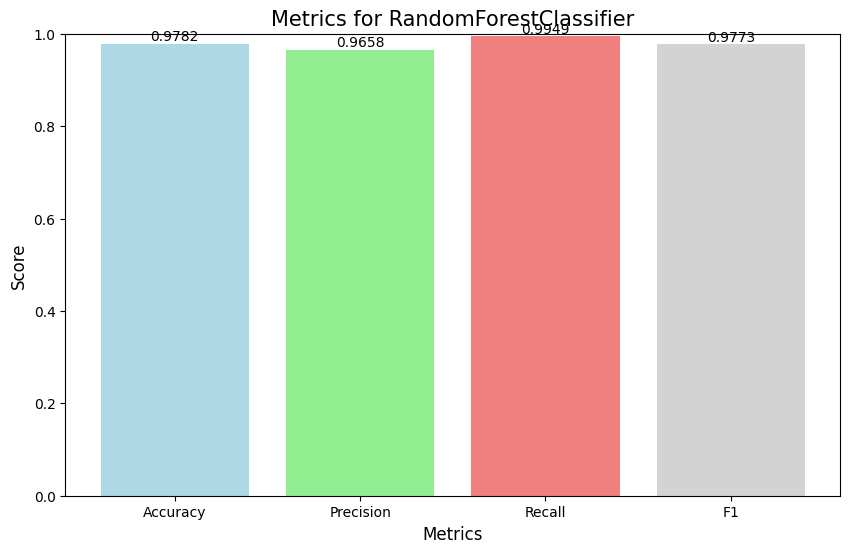

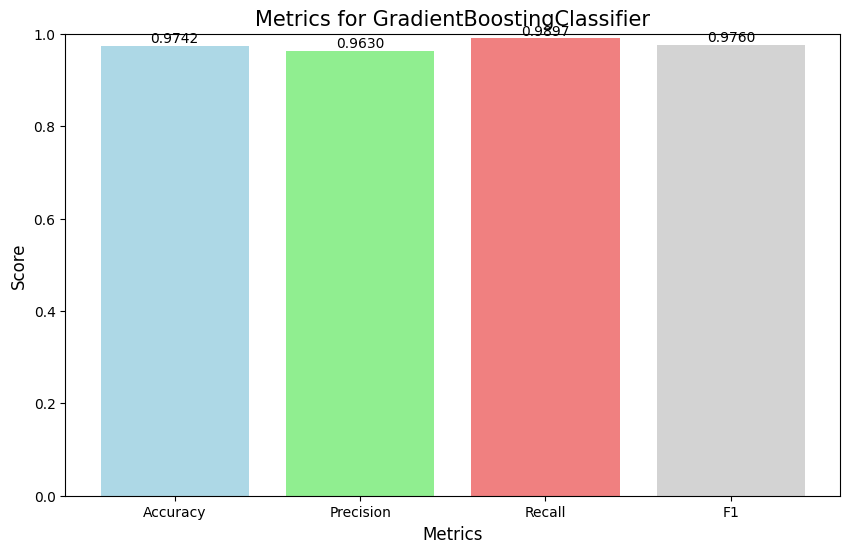

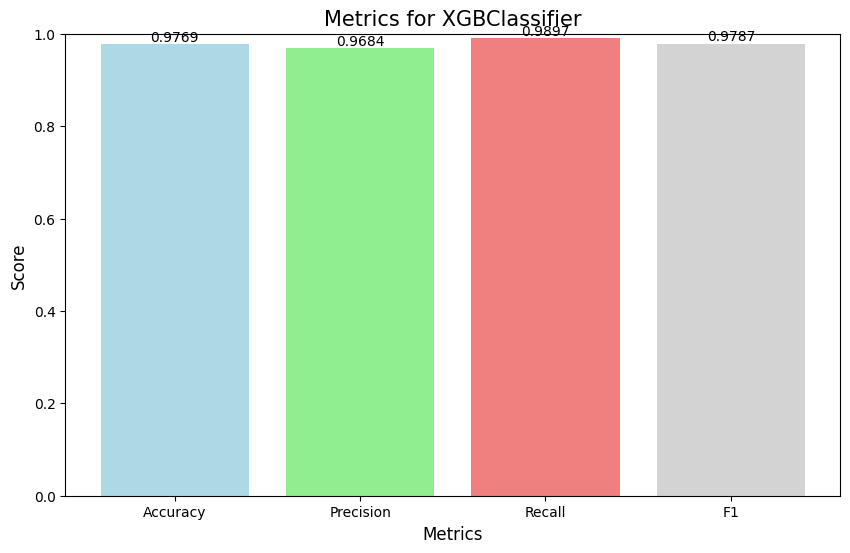

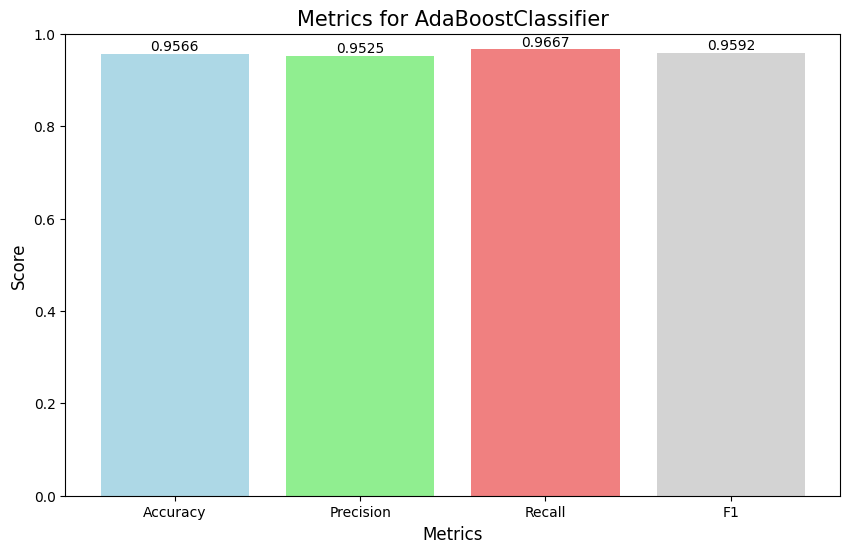

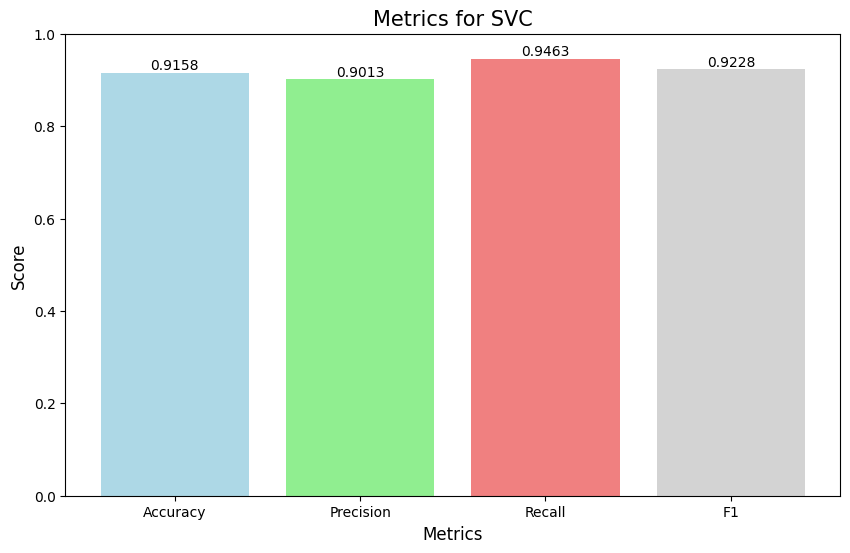

In [ ]:
import numpy as np

# Her bir model için ayrı bar grafikleri oluşturma
for model_name in model_names:
    model_data = results_df[results_df["Model"] == model_name]
    metrics_values = model_data[metrics].values[0]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, metrics_values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightgrey'])
    plt.title(f'Metrics for {model_name}', fontsize=15)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1)  # Y ekseni sınırlarını 0 ve 1 arasında ayarla

    # Her bir çubuğun üstüne skorları yazma
    for i, value in enumerate(metrics_values):
        plt.text(i, value, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

    plt.show()


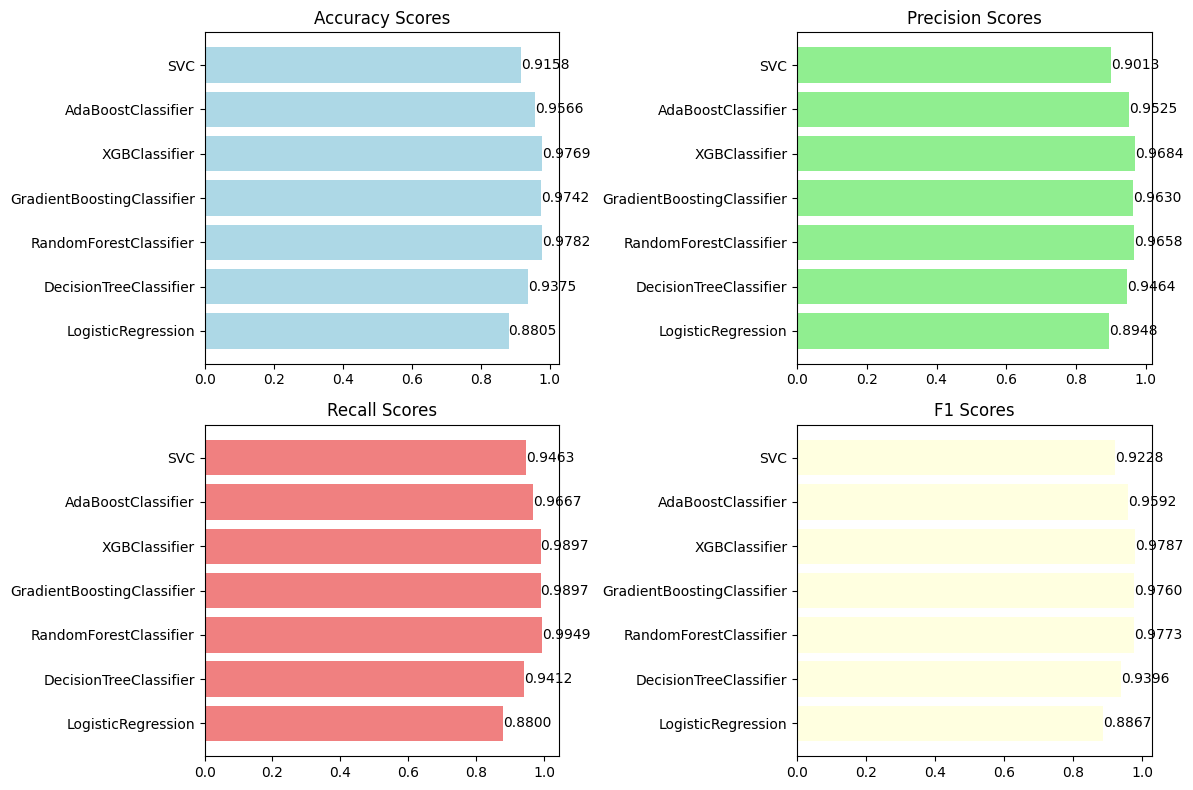

In [ ]:
import matplotlib.pyplot as plt

# Modellerin isimleri
model_names = results_df["Model"]

# Her bir metriğin değerlerini alalım
accuracy_scores = results_df["Accuracy"]
precision_scores = results_df["Precision"]
recall_scores = results_df["Recall"]
f1_scores = results_df["F1"]

# Görselleştirme
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
bars = plt.barh(model_names, accuracy_scores, color='lightblue')
plt.title('Accuracy Scores')
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', va='center')

# Precision
plt.subplot(2, 2, 2)
bars = plt.barh(model_names, precision_scores, color='lightgreen')
plt.title('Precision Scores')
for bar, score in zip(bars, precision_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', va='center')

# Recall
plt.subplot(2, 2, 3)
bars = plt.barh(model_names, recall_scores, color='lightcoral')
plt.title('Recall Scores')
for bar, score in zip(bars, recall_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', va='center')

# F1
plt.subplot(2, 2, 4)
bars = plt.barh(model_names, f1_scores, color='lightyellow')
plt.title('F1 Scores')
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Her bir model için confusion matrix değerlerini hesaplama
confusion_matrices_test = {}
for model, model_name in zip(trained_models, model_names):
    y_pred_test = model.predict(X_test_scaled)
    matrix_test = confusion_matrix(y_test, y_pred_test)
    confusion_matrices_test[model_name] = matrix_test

# Confusion matrix değerlerini yazdırma
for model_name, matrix_test in confusion_matrices_test.items():
    print(f"Confusion Matrix for {model_name} (Test):")
    print(matrix_test)
    print()


Confusion Matrix for LogisticRegression (Test):
[[311  33]
 [ 37 355]]

Confusion Matrix for DecisionTreeClassifier (Test):
[[337   7]
 [  6 386]]

Confusion Matrix for RandomForestClassifier (Test):
[[337   7]
 [  2 390]]

Confusion Matrix for GradientBoostingClassifier (Test):
[[337   7]
 [  3 389]]

Confusion Matrix for XGBClassifier (Test):
[[339   5]
 [  2 390]]

Confusion Matrix for AdaBoostClassifier (Test):
[[327  17]
 [ 11 381]]

Confusion Matrix for SVC (Test):
[[344   0]
 [371  21]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

# Her bir model için tahminleri ve confusion matrix'leri oluşturma
y_pred_logistic = cross_val_predict(LogisticRegression(), X_test_scaled, y_test, cv=10)
matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

y_pred_decision_tree = cross_val_predict(DecisionTreeClassifier(), X_test_scaled, y_test, cv=10)
matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

y_pred_random_forest = cross_val_predict(RandomForestClassifier(), X_test_scaled, y_test, cv=10)
matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

y_pred_gradient_boosting = cross_val_predict(GradientBoostingClassifier(), X_test_scaled, y_test, cv=10)
matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)

y_pred_xgboost = cross_val_predict(XGBClassifier(), X_test_scaled, y_test, cv=10)
matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)

y_pred_ada_boost = cross_val_predict(AdaBoostClassifier(), X_test_scaled, y_test, cv=10)
matrix_ada_boost = confusion_matrix(y_test, y_pred_ada_boost)

y_pred_svc = cross_val_predict(SVC(), X_test_scaled, y_test, cv=10)
matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Confusion matrix'leri ekrana yazdırma
print("Confusion Matrix for Logistic Regression:")
print(matrix_logistic)
print()

print("Confusion Matrix for Decision Tree:")
print(matrix_decision_tree)
print()

print("Confusion Matrix for Random Forest:")
print(matrix_random_forest)
print()

print("Confusion Matrix for Gradient Boosting:")
print(matrix_gradient_boosting)
print()

print("Confusion Matrix for XGBoost:")
print(matrix_xgboost)
print()

print("Confusion Matrix for AdaBoost:")
print(matrix_ada_boost)
print()

print("Confusion Matrix for SVC:")
print(matrix_svc)


Confusion Matrix for Logistic Regression:
[[305  39]
 [ 46 346]]

Confusion Matrix for Decision Tree:
[[324  20]
 [ 19 373]]

Confusion Matrix for Random Forest:
[[333  11]
 [  2 390]]

Confusion Matrix for Gradient Boosting:
[[329  15]
 [  7 385]]

Confusion Matrix for XGBoost:
[[331  13]
 [  5 387]]

Confusion Matrix for AdaBoost:
[[325  19]
 [ 20 372]]

Confusion Matrix for SVC:
[[296  48]
 [ 25 367]]


In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak confusion matrix hesapla
confusion_matrices = {}
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X_test_scaled, y_test, cv=cv)
    matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[model.__class__.__name__] = matrix

# Confusion matrix değerlerini yazdırma
for model_name, matrix in confusion_matrices.items():
    print(f"Confusion Matrix for {model_name} (Test):")
    print(matrix)
    print()


Confusion Matrix for LogisticRegression (Test):
[[303  41]
 [ 47 345]]

Confusion Matrix for DecisionTreeClassifier (Test):
[[323  21]
 [ 26 366]]

Confusion Matrix for RandomForestClassifier (Test):
[[329  15]
 [  4 388]]

Confusion Matrix for GradientBoostingClassifier (Test):
[[329  15]
 [  4 388]]

Confusion Matrix for XGBClassifier (Test):
[[331  13]
 [  4 388]]

Confusion Matrix for AdaBoostClassifier (Test):
[[325  19]
 [ 13 379]]

Confusion Matrix for SVC (Test):
[[303  41]
 [ 21 371]]



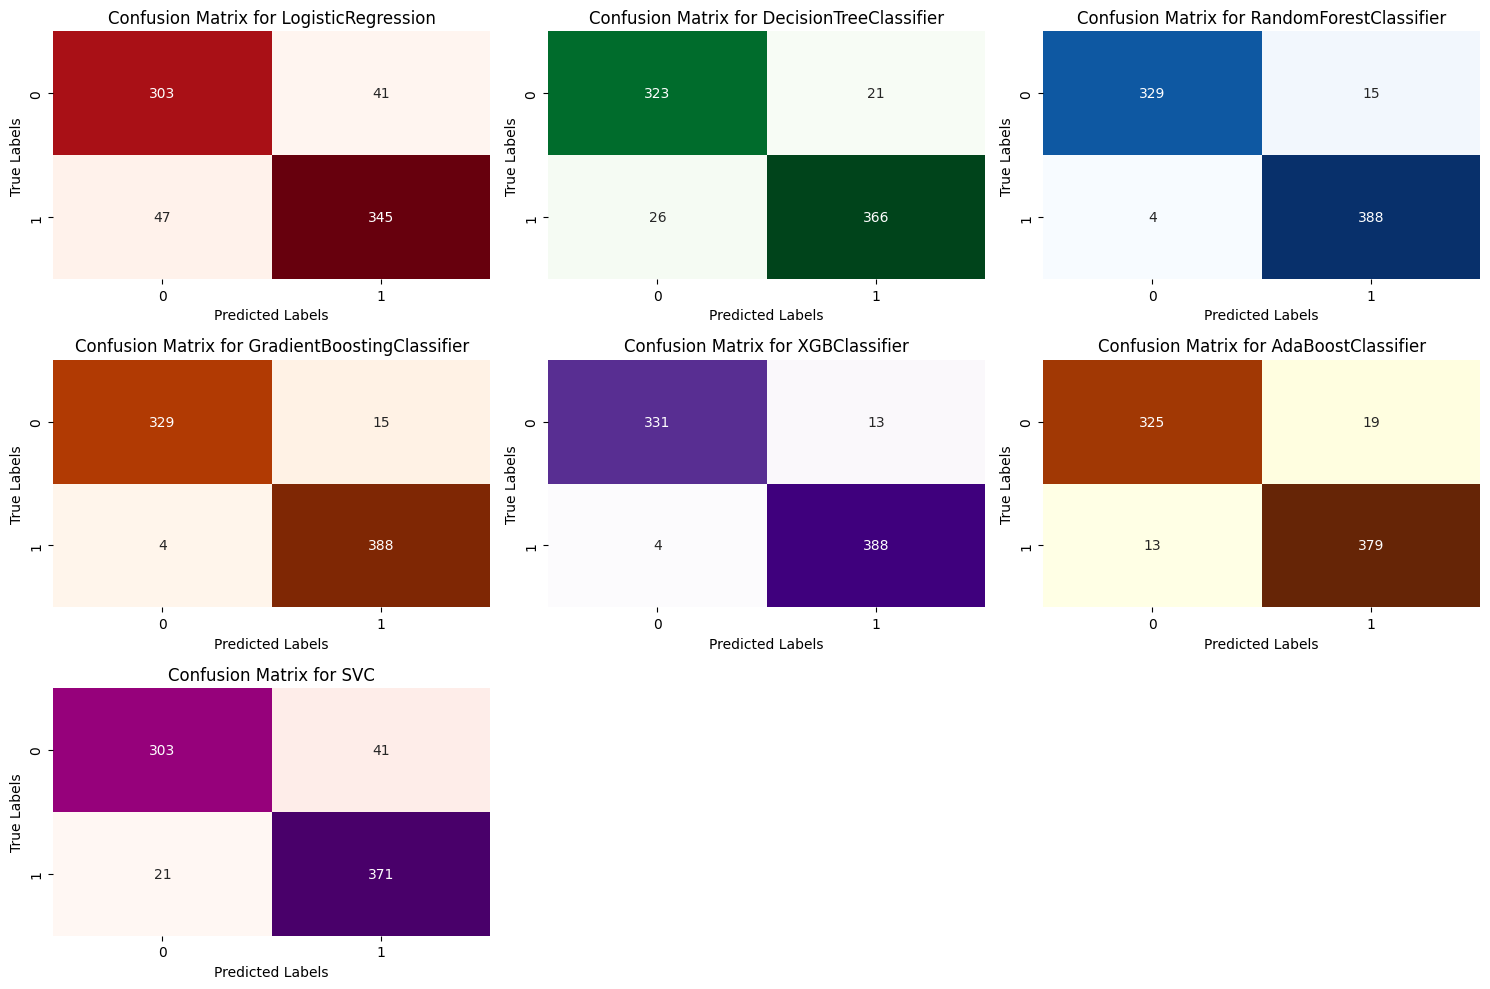

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Renk paletleri
cmaps = ['Reds', 'Greens', 'Blues', 'Oranges', 'Purples', 'YlOrBr', 'RdPu']

# Confusion matrix görselleştirme
plt.figure(figsize=(15, 10))

for i, (model_name, matrix) in enumerate(confusion_matrices.items(), start=1):
    plt.subplot(3, 3, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap=cmaps[i-1], cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA modelini oluşturma
pca = PCA(n_components=2)  # İki bileşen seçildi, ancak gerektiğinde değiştirilebilir

# Verileri PCA'ya uydurma ve dönüştürme
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results_pca = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='f1')

    accuracy_mean = accuracy_scores.mean()
    precision_mean = precision_scores.mean()
    recall_mean = recall_scores.mean()
    f1_mean = f1_scores.mean()

    results_pca.append([model.__class__.__name__, accuracy_mean, precision_mean, recall_mean, f1_mean])

# Sonuçları DataFrame'e kaydetme
results_pca_df = pd.DataFrame(results_pca, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

# Sonuçları yazdırma
print("PCA Results:")
print(results_pca_df)


PCA Results:
                        Model  Accuracy  Precision    Recall        F1
0          LogisticRegression  0.854702   0.881236  0.841538  0.860161
1      DecisionTreeClassifier  0.940226   0.942553  0.946218  0.946232
2      RandomForestClassifier  0.941559   0.958769  0.928269  0.940556
3  GradientBoostingClassifier  0.932025   0.955959  0.915513  0.934519
4               XGBClassifier  0.936042   0.942833  0.938526  0.939716
5          AdaBoostClassifier  0.923880   0.943346  0.912949  0.926825
6                         SVC  0.895372   0.965226  0.833782  0.893610


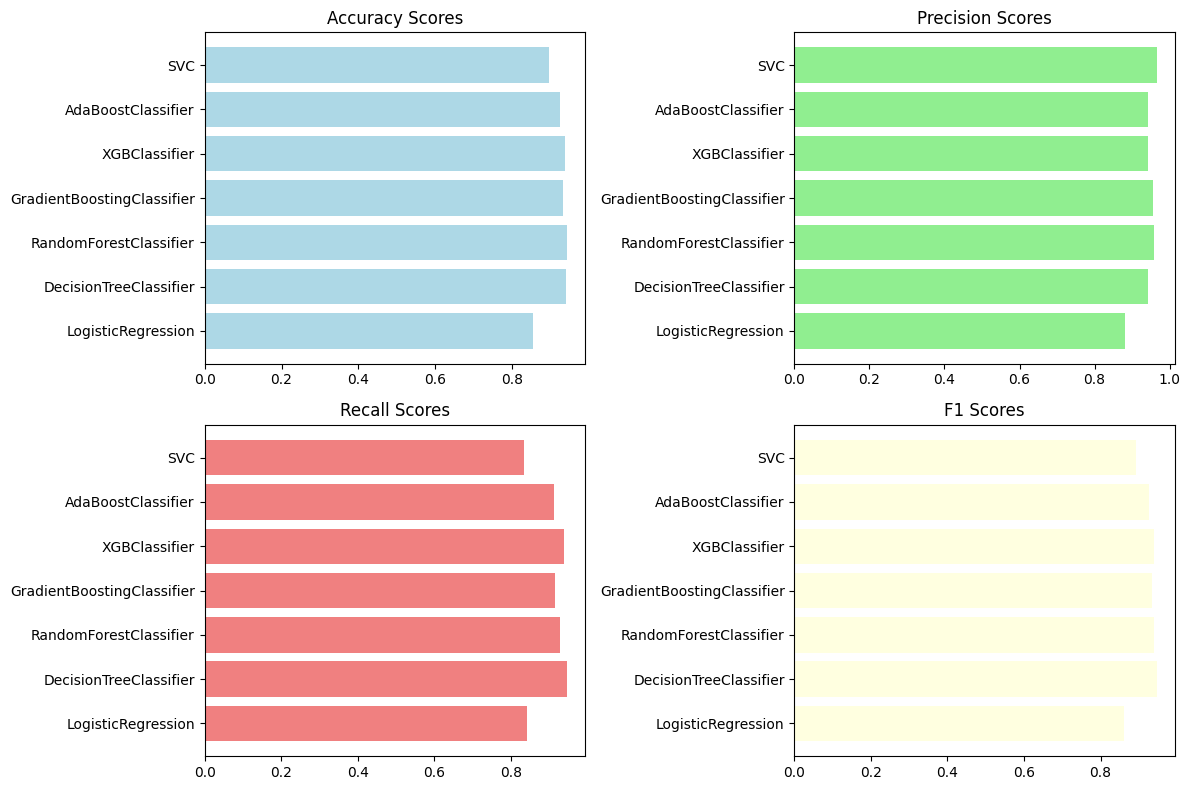

In [ ]:
import matplotlib.pyplot as plt

# Model isimleri
model_names = results_pca_df["Model"]

# Metrikler
accuracy_scores = results_pca_df["Accuracy"]
precision_scores = results_pca_df["Precision"]
recall_scores = results_pca_df["Recall"]
f1_scores = results_pca_df["F1"]

# Görselleştirme
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.barh(model_names, accuracy_scores, color='lightblue')
plt.title('Accuracy Scores')

# Precision
plt.subplot(2, 2, 2)
plt.barh(model_names, precision_scores, color='lightgreen')
plt.title('Precision Scores')

# Recall
plt.subplot(2, 2, 3)
plt.barh(model_names, recall_scores, color='lightcoral')
plt.title('Recall Scores')

# F1
plt.subplot(2, 2, 4)
plt.barh(model_names, f1_scores, color='lightyellow')
plt.title('F1 Scores')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Varyans eşiği belirleme
threshold = 0.5  # Eşik değeri, gerektiğinde değiştirilebilir

# Varyans eşiğini kullanarak özellikleri seçme
selector = VarianceThreshold(threshold)
X_train_selected = selector.fit_transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results_variance_threshold = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='f1')

    accuracy_mean = accuracy_scores.mean()
    precision_mean = precision_scores.mean()
    recall_mean = recall_scores.mean()
    f1_mean = f1_scores.mean()

    results_variance_threshold.append([model.__class__.__name__, accuracy_mean, precision_mean, recall_mean, f1_mean])

# Sonuçları DataFrame'e kaydetme
results_variance_threshold_df = pd.DataFrame(results_variance_threshold, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

# Sonuçları yazdırma
print("\nVariance Thresholding Results:")
print(results_variance_threshold_df)



Variance Thresholding Results:
                        Model  Accuracy  Precision    Recall        F1
0          LogisticRegression  0.880507   0.894762  0.880000  0.886661
1      DecisionTreeClassifier  0.945576   0.954323  0.941154  0.947565
2      RandomForestClassifier  0.980951   0.965769  0.992308  0.975146
3  GradientBoostingClassifier  0.974195   0.963027  0.989744  0.976038
4               XGBClassifier  0.976897   0.968435  0.989744  0.978656
5          AdaBoostClassifier  0.956553   0.952460  0.966667  0.959211
6                         SVC  0.915772   0.901296  0.946346  0.922825


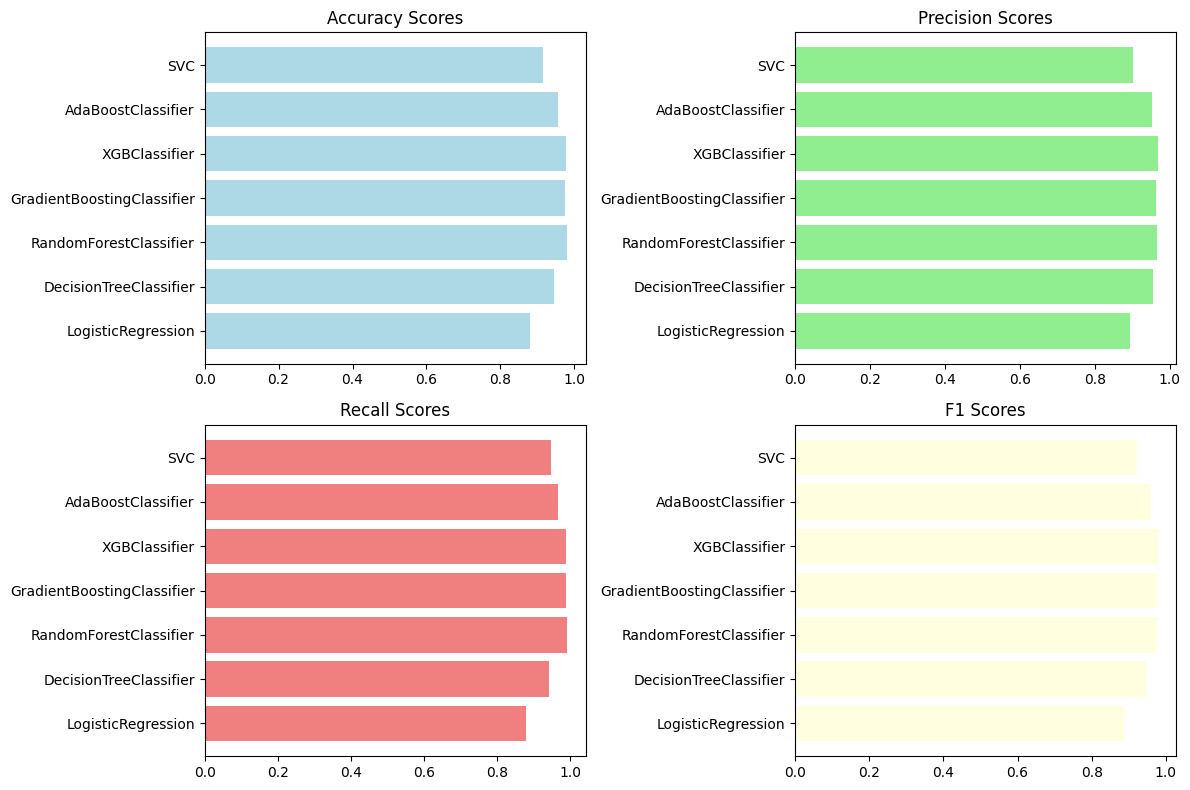

In [ ]:
import matplotlib.pyplot as plt

# Model isimleri
model_names = results_variance_threshold_df["Model"]

# Metrikler
accuracy_scores = results_variance_threshold_df["Accuracy"]
precision_scores = results_variance_threshold_df["Precision"]
recall_scores = results_variance_threshold_df["Recall"]
f1_scores = results_variance_threshold_df["F1"]

# Görselleştirme
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.barh(model_names, accuracy_scores, color='lightblue')
plt.title('Accuracy Scores')

# Precision
plt.subplot(2, 2, 2)
plt.barh(model_names, precision_scores, color='lightgreen')
plt.title('Precision Scores')

# Recall
plt.subplot(2, 2, 3)
plt.barh(model_names, recall_scores, color='lightcoral')
plt.title('Recall Scores')

# F1
plt.subplot(2, 2, 4)
plt.barh(model_names, f1_scores, color='lightyellow')
plt.title('F1 Scores')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Varyans eşiği belirleme
threshold = 1  # Eşik değeri, gerektiğinde değiştirilebilir

# Varyans eşiğini kullanarak özellikleri seçme
selector = VarianceThreshold(threshold)
X_train_selected = selector.fit_transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results_variance_threshold = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_test_selected, y_test, cv=cv, scoring='f1')

    accuracy_mean = accuracy_scores.mean()
    precision_mean = precision_scores.mean()
    recall_mean = recall_scores.mean()
    f1_mean = f1_scores.mean()

    results_variance_threshold.append([model.__class__.__name__, accuracy_mean, precision_mean, recall_mean, f1_mean])

# Sonuçları DataFrame'e kaydetme
results_variance_threshold_df = pd.DataFrame(results_variance_threshold, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

# Sonuçları yazdırma
print("\nVariance Thresholding (threshold=1) Results:")
print(results_variance_threshold_df)



Variance Thresholding (threshold=1) Results:
                        Model  Accuracy  Precision    Recall        F1
0          LogisticRegression  0.849297   0.862834  0.854551  0.858237
1      DecisionTreeClassifier  0.933469   0.923104  0.956474  0.940378
2      RandomForestClassifier  0.949685   0.934889  0.971859  0.956679
3  GradientBoostingClassifier  0.949741   0.929970  0.982051  0.954590
4               XGBClassifier  0.944317   0.922897  0.979487  0.949737
5          AdaBoostClassifier  0.915846   0.924732  0.918077  0.920372
6                         SVC  0.849315   0.874305  0.844231  0.856141


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA modelini oluşturma
pca = PCA(n_components=6)  # İki bileşen seçildi, ancak gerektiğinde değiştirilebilir

# Verileri PCA'ya uydurma ve dönüştürme
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results_pca = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_test_pca, y_test, cv=cv, scoring='f1')

    accuracy_mean = accuracy_scores.mean()
    precision_mean = precision_scores.mean()
    recall_mean = recall_scores.mean()
    f1_mean = f1_scores.mean()

    results_pca.append([model.__class__.__name__, accuracy_mean, precision_mean, recall_mean, f1_mean])

# Sonuçları DataFrame'e kaydetme
results_pca_df = pd.DataFrame(results_pca, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

# Sonuçları yazdırma
print("PCA components=6 Results:")
print(results_pca_df)


PCA components=6 Results:
                        Model  Accuracy  Precision    Recall        F1
0          LogisticRegression  0.857386   0.876619  0.854487  0.864433
1      DecisionTreeClassifier  0.949778   0.946255  0.961538  0.952272
2      RandomForestClassifier  0.966050   0.977082  0.961538  0.968980
3  GradientBoostingClassifier  0.955220   0.957866  0.958974  0.957872
4               XGBClassifier  0.970141   0.970203  0.974359  0.971943
5          AdaBoostClassifier  0.941540   0.953738  0.936090  0.943981
6                         SVC  0.921196   0.930424  0.923269  0.925537


In [ ]:
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for i, (train_index, test_index) in enumerate(cv.split(X_test_scaled, y_test), start=1):
        X_train_fold, X_test_fold = X_test_scaled[train_index], X_test_scaled[test_index]
        y_train_fold, y_test_fold = y_test[train_index], y_test[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        accuracy = accuracy_score(y_test_fold, y_pred)
        precision = precision_score(y_test_fold, y_pred)
        recall = recall_score(y_test_fold, y_pred)
        f1 = f1_score(y_test_fold, y_pred)

        results.append([model.__class__.__name__, i, accuracy, precision, recall, f1])

# Sonuçları DataFrame'e kaydetme
results_df = pd.DataFrame(results, columns=["Model", "Iter", "Acc", "Pre", "Rec", "F1"])

# Tüm satırları gösterme
pd.set_option('display.max_rows', None)

# Sonuçları yazdırma
print(results_df)


                         Model  Iter       Acc       Pre       Rec        F1
0           LogisticRegression     1  0.891892  0.878049  0.923077  0.900000
1           LogisticRegression     2  0.783784  0.794872  0.794872  0.794872
2           LogisticRegression     3  0.878378  0.916667  0.846154  0.880000
3           LogisticRegression     4  0.851351  0.833333  0.897436  0.864198
4           LogisticRegression     5  0.905405  0.923077  0.900000  0.911392
5           LogisticRegression     6  0.918919  0.947368  0.900000  0.923077
6           LogisticRegression     7  0.931507  0.925000  0.948718  0.936709
7           LogisticRegression     8  0.917808  0.923077  0.923077  0.923077
8           LogisticRegression     9  0.863014  0.914286  0.820513  0.864865
9           LogisticRegression    10  0.863014  0.891892  0.846154  0.868421
10      DecisionTreeClassifier     1  0.945946  0.948718  0.948718  0.948718
11      DecisionTreeClassifier     2  0.932432  0.886364  1.000000  0.939759

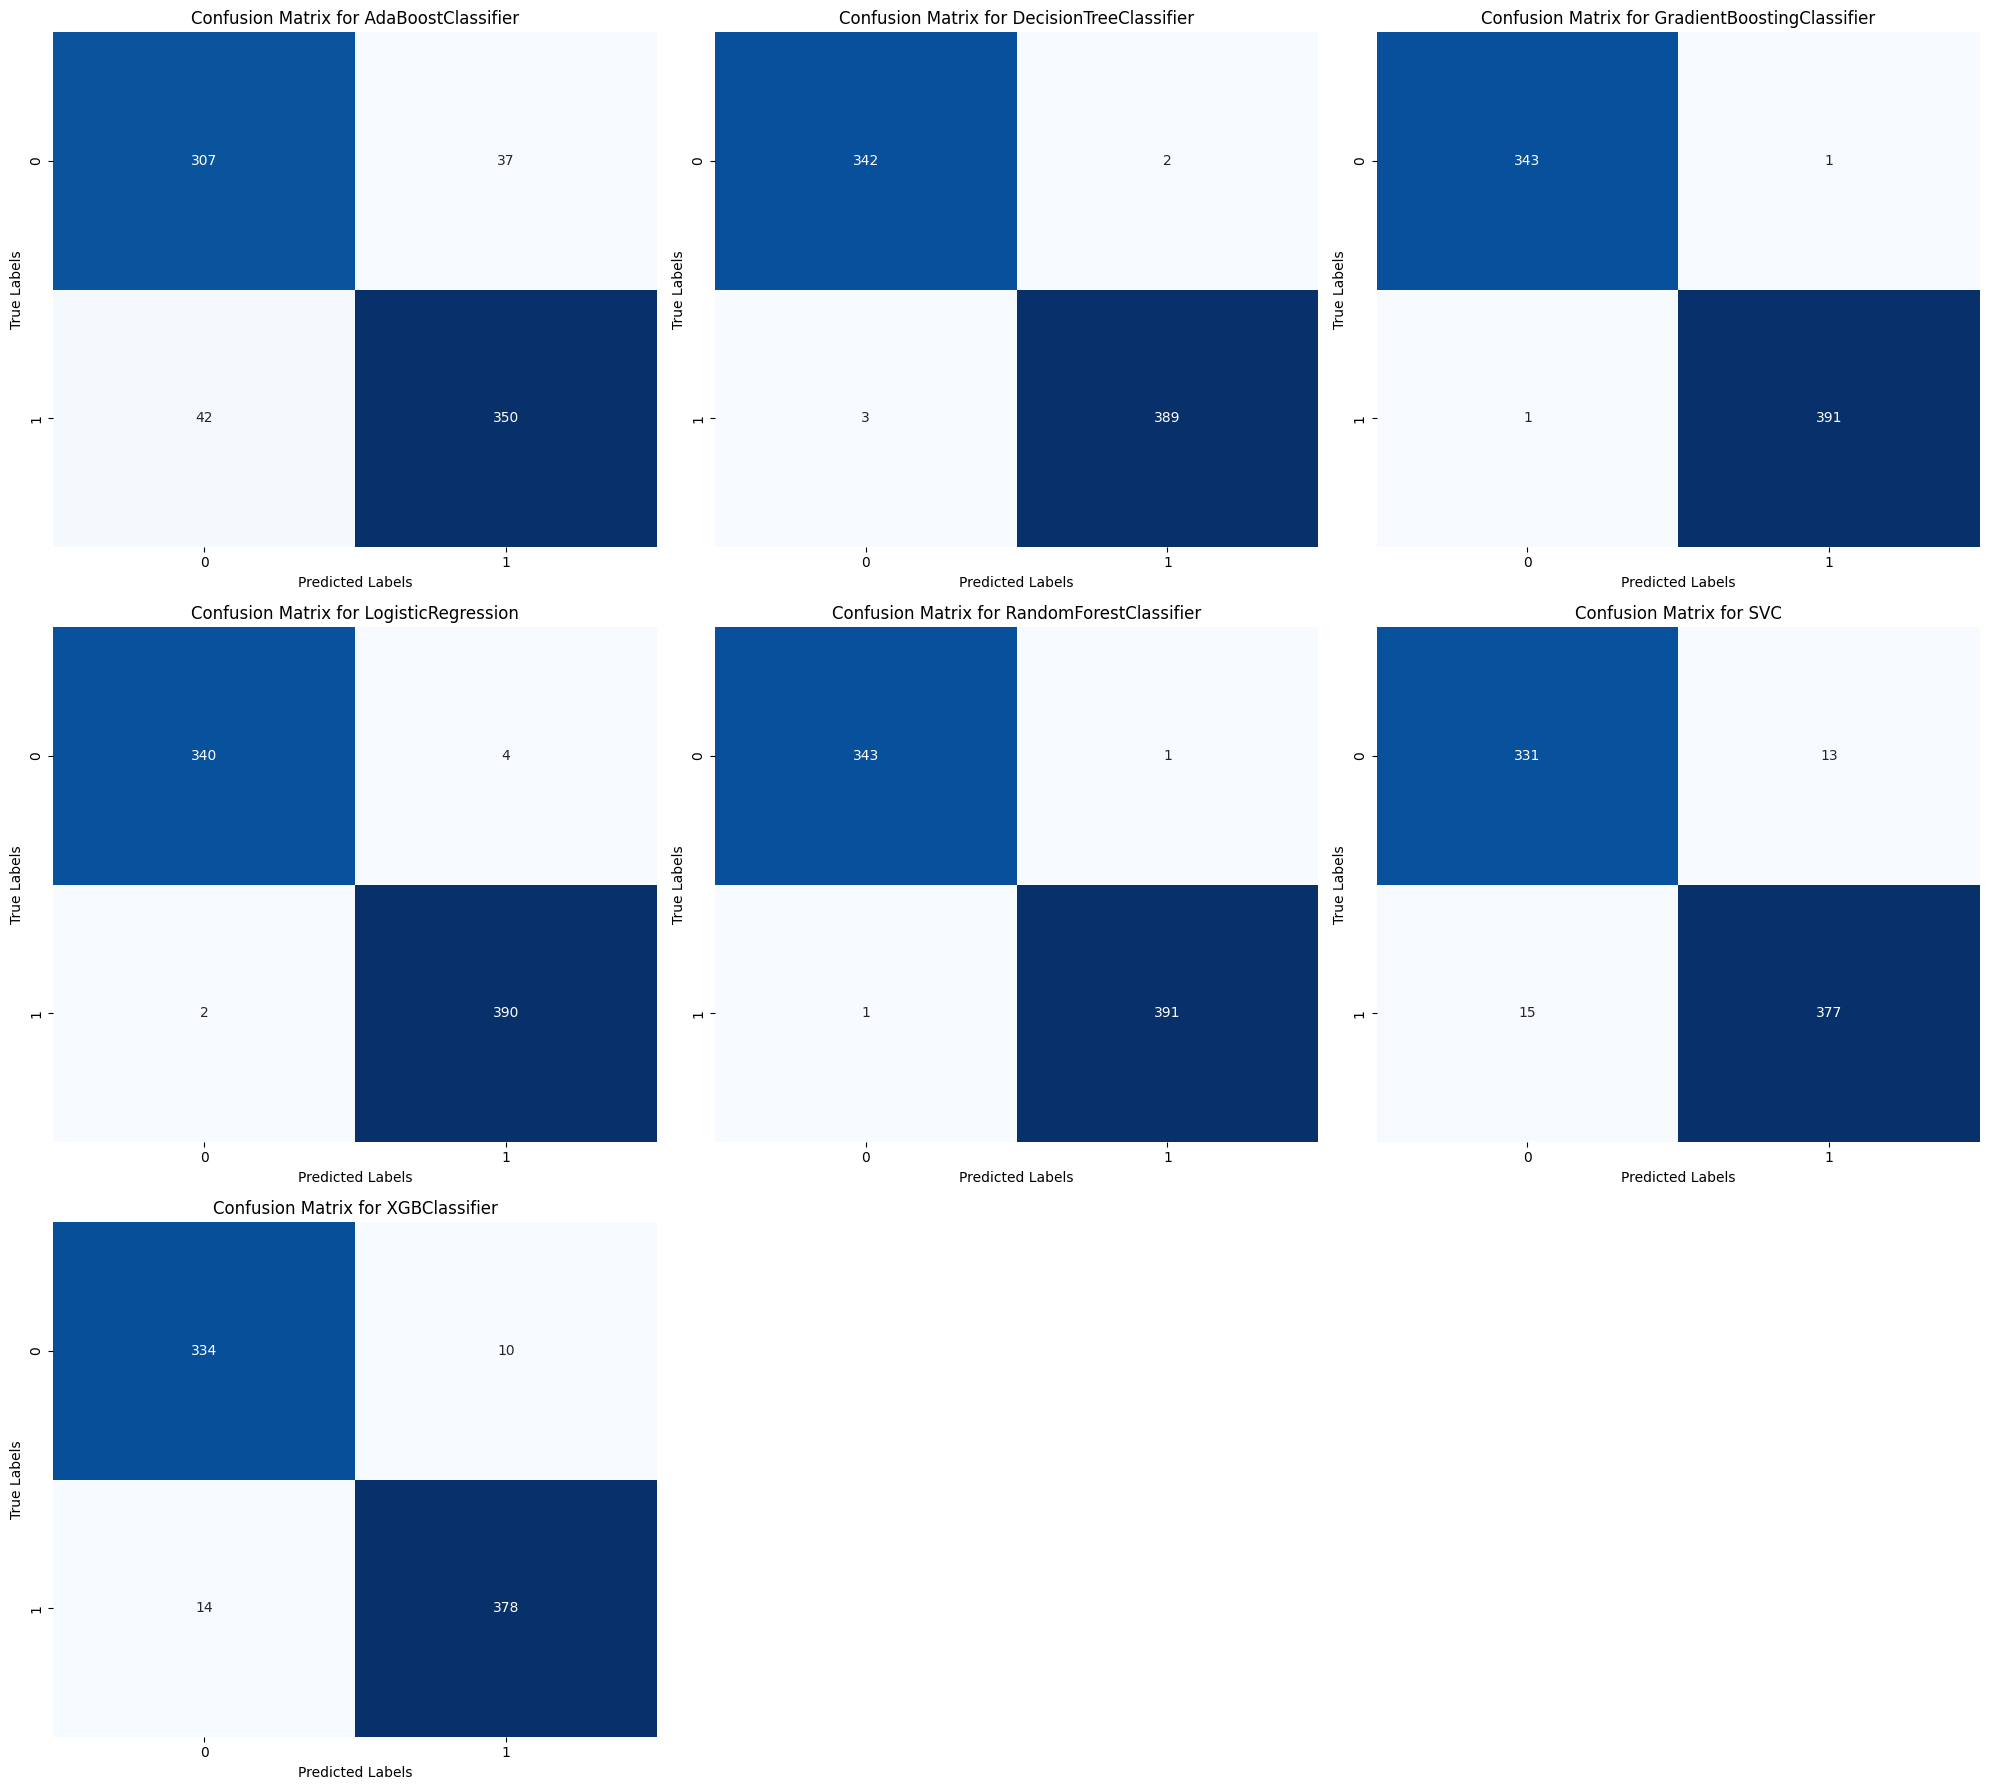

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Son iterasyon sonuçlarını filtreleme
final_results = results_df.groupby('Model').last().reset_index()

# Boyutlandırma
num_models = final_results.shape[0]
num_cols = 3
num_rows = (num_models - 1) // num_cols + 1

# Her bir model için karışıklık matrisini oluşturma ve görselleştirme
plt.figure(figsize=(20, 6 * num_rows))

for i, row in final_results.iterrows():
    model_name = row['Model']
    y_true = np.array(y_test)
    y_pred = models[i].predict(X_test_scaled)
    cm = confusion_matrix(y_true, y_pred)

    plt.subplot(num_rows, num_cols, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

plt.tight_layout()
plt.show()



In [ ]:
for i, row in final_results.iterrows():
    model_name = row['Model']
    y_true = np.array(y_test)
    y_pred = models[i].predict(X_test_scaled)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print()


Confusion Matrix for AdaBoostClassifier:
[[307  37]
 [ 42 350]]

Confusion Matrix for DecisionTreeClassifier:
[[342   2]
 [  3 389]]

Confusion Matrix for GradientBoostingClassifier:
[[343   1]
 [  1 391]]

Confusion Matrix for LogisticRegression:
[[340   4]
 [  2 390]]

Confusion Matrix for RandomForestClassifier:
[[343   1]
 [  1 391]]

Confusion Matrix for SVC:
[[331  13]
 [ 15 377]]

Confusion Matrix for XGBClassifier:
[[334  10]
 [ 14 378]]



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA modelini oluşturma
pca = PCA(n_components=2)  # İki bileşen seçildi, ancak gerektiğinde değiştirilebilir

# Verileri PCA'ya uydurma ve dönüştürme
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results_pca = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for i, (train_index, test_index) in enumerate(cv.split(X_test_pca, y_test), start=1):
        X_train_fold, X_test_fold = X_test_pca[train_index], X_test_pca[test_index]
        y_train_fold, y_test_fold = y_test[train_index], y_test[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        accuracy = accuracy_score(y_test_fold, y_pred)
        precision = precision_score(y_test_fold, y_pred)
        recall = recall_score(y_test_fold, y_pred)
        f1 = f1_score(y_test_fold, y_pred)

        results_pca.append([model.__class__.__name__, i, accuracy, precision, recall, f1])

# Sonuçları DataFrame'e kaydetme
results_pca_df = pd.DataFrame(results_pca, columns=["Model", "Iter", "Acc", "Pre", "Rec", "F1"])

# Maksimum satır sayısını ayarlama
pd.set_option('display.max_rows', None)

# Sonuçları yazdırma
print("PCA Results:")
print(results_pca_df)


PCA Results:
                         Model  Iter       Acc       Pre       Rec        F1
0           LogisticRegression     1  0.824324  0.861111  0.794872  0.826667
1           LogisticRegression     2  0.797297  0.833333  0.769231  0.800000
2           LogisticRegression     3  0.878378  0.916667  0.846154  0.880000
3           LogisticRegression     4  0.837838  0.846154  0.846154  0.846154
4           LogisticRegression     5  0.851351  0.837209  0.900000  0.867470
5           LogisticRegression     6  0.878378  0.878049  0.900000  0.888889
6           LogisticRegression     7  0.876712  0.894737  0.871795  0.883117
7           LogisticRegression     8  0.876712  0.916667  0.846154  0.880000
8           LogisticRegression     9  0.849315  0.911765  0.794872  0.849315
9           LogisticRegression    10  0.876712  0.916667  0.846154  0.880000
10      DecisionTreeClassifier     1  0.891892  0.918919  0.871795  0.894737
11      DecisionTreeClassifier     2  0.918919  0.902439  0.948

In [ ]:
# PCA bileşenlerinin orijinal özellikler üzerindeki ağırlıklarını bulma
pca_weights = pd.DataFrame(pca.components_, columns=X.columns, index=[f'Component {i+1}' for i in range(pca.n_components_)])

print("PCA Bileşenlerinin Orijinal Özellikler Üzerindeki Ağırlıkları:")
print(pca_weights)


PCA Bileşenlerinin Orijinal Özellikler Üzerindeki Ağırlıkları:
                   A1        A2        A3        A4        A5        A6  \
Component 1  0.296365  0.265202  0.276177  0.301153  0.307631  0.297684   
Component 2  0.055367 -0.019817  0.014350 -0.039482 -0.044958 -0.183184   

                   A7        A8        A9  A10_Autism_Spectrum_Quotient  \
Component 1  0.287019  0.252252  0.298060                      0.152771   
Component 2 -0.133129  0.094070 -0.142364                      0.032419   

             Age_Years  Qchat_10_Score       Sex  Jaundice  \
Component 1  -0.169158        0.361599  0.039193 -0.023068   
Component 2  -0.329098       -0.088886 -0.215180 -0.398011   

             Family_mem_with_ASD  Ethnicity_Asian  Ethnicity_Black  \
Component 1             0.052196        -0.035552         0.048924   
Component 2            -0.219908        -0.034713         0.052423   

             Ethnicity_Hispanic  Ethnicity_Latino  Ethnicity_Middle Eastern  \
Componen

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setinin eğitim ve test olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Varyans eşiği belirleme
threshold = 0.5  # Eşik değeri, gerektiğinde değiştirilebilir

# Varyans eşiğini kullanarak özellikleri seçme
selector = VarianceThreshold(threshold)
X_train_selected = selector.fit_transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Model tanımlamaları
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    SVC()
]

# Her bir model için 10 katlı çapraz doğrulama kullanarak metrikleri hesapla
results_variance_threshold = []
for model in models:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for i, (train_index, test_index) in enumerate(cv.split(X_test_selected, y_test), start=1):
        X_train_fold, X_test_fold = X_test_selected[train_index], X_test_selected[test_index]
        y_train_fold, y_test_fold = y_test[train_index], y_test[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        accuracy = accuracy_score(y_test_fold, y_pred)
        precision = precision_score(y_test_fold, y_pred)
        recall = recall_score(y_test_fold, y_pred)
        f1 = f1_score(y_test_fold, y_pred)

        results_variance_threshold.append([model.__class__.__name__, i, accuracy, precision, recall, f1])

# Sonuçları DataFrame'e kaydetme
results_variance_threshold_df = pd.DataFrame(results_variance_threshold, columns=["Model", "Iter", "Acc", "Pre", "Rec", "F1"])

# Maksimum satır sayısını ayarlama
pd.set_option('display.max_rows', None)

# Sonuçları yazdırma
print("\nVariance Thresholding Results:")
print(results_variance_threshold_df)



Variance Thresholding Results:
                         Model  Iter       Acc       Pre       Rec        F1
0           LogisticRegression     1  0.891892  0.878049  0.923077  0.900000
1           LogisticRegression     2  0.783784  0.794872  0.794872  0.794872
2           LogisticRegression     3  0.878378  0.916667  0.846154  0.880000
3           LogisticRegression     4  0.851351  0.833333  0.897436  0.864198
4           LogisticRegression     5  0.905405  0.923077  0.900000  0.911392
5           LogisticRegression     6  0.918919  0.947368  0.900000  0.923077
6           LogisticRegression     7  0.931507  0.925000  0.948718  0.936709
7           LogisticRegression     8  0.917808  0.923077  0.923077  0.923077
8           LogisticRegression     9  0.863014  0.914286  0.820513  0.864865
9           LogisticRegression    10  0.863014  0.891892  0.846154  0.868421
10      DecisionTreeClassifier     1  0.932432  0.947368  0.923077  0.935065
11      DecisionTreeClassifier     2  0.9324

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Varyans eşiği belirleme
threshold = 0.5  # Eşik değeri, gerektiğinde değiştirilebilir

# Varyans eşiğini kullanarak özellikleri seçme
selector = VarianceThreshold(threshold)
X_selected = selector.fit_transform(X)

# Seçilen özelliklerin indekslerini alıyoruz
selected_features_indices = selector.get_support(indices=True)

# Seçilen özelliklerin isimlerini alıyoruz
selected_features_names = X.columns[selected_features_indices]

# Seçilen özelliklerin isimlerini yazdırma
print("Seçilen Özellikler:")
print(selected_features_names)


Seçilen Özellikler:
Index(['Age_Years', 'Qchat_10_Score'], dtype='object')
